# 3) Exploratory Data Analysis

## Table of content  
3.1) Import necessary packages and load data

3.2) Explore data  
&emsp;3.2.1) Categorical variables  
&emsp;3.2.2) Numerical variables  
&emsp;3.2.3) Target variable  
&emsp;&emsp;3.2.3.1) Target variables  
&emsp;&emsp;3.2.3.2) Target variables across Gender  
&emsp;&emsp;3.2.3.3) Target variables across Country  
&emsp;&emsp;&emsp;Including:  
&emsp;&emsp;&emsp;- T-test to compare Amyl- and Cannabis-usage between US and UK.  
&emsp;&emsp;&emsp;- Calculate association b/w Amyl- and Cannabis-usage and categorical features ( ‘country’).  
&emsp;&emsp;3.2.3.4) Target variables across Education groups  
&emsp;&emsp;3.2.3.5) Target variables across Age groups  
&emsp;&emsp;3.2.3.6) Association between Amyl and Cannabis usage

3.3) Correlation  
&emsp;3.3.1) Correlation matrix and heatmap  
&emsp;3.3.2) Bivariate chart  
&emsp;&emsp;3.3.2.1) Distribution of features across users and non_users  
&emsp;&emsp;3.3.2.2) Proportions of drug_users across feature quintiles  
&emsp;3.3.3) Scatterplots of different pairs of features  

3.4) Principal Component Analysis (PCA)  
&emsp;3.4.1) PCA for seven personality features  
&emsp;3.4.2) PCA for seven personality features and Age, Gender and Education  
    
3.5) Random Forest Feature Importance  
&emsp;3.5.1) Prepare Dataframe X and y  
&emsp;3.5.2) Feature importance to predict Amyl user  
&emsp;3.5.3) Feature importance to predict Cannabis user  

Dataset is from this link:
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

## 3.1) Import packages and load data

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import more
import scipy.stats as ss
from scipy.stats import pearsonr

In [2]:
# Read in the latest dataset
drug_1 = pd.read_csv('../data/drug_1.csv', index_col=0)
drug_1.head()

ID  Age_value  Gender_value  Education_value  Country_value  \
0   1    0.49788       0.48246         -0.05921        0.96082   
1   2   -0.07854      -0.48246          1.98437        0.96082   
2   3    0.49788      -0.48246         -0.05921        0.96082   
3   4   -0.95197       0.48246          1.16365        0.96082   
4   5    0.49788       0.48246          1.98437        0.96082   

   Ethnicity_value   Nscore   Escore   Oscore   Ascore  ...  Gender  \
0          0.12600  0.31287 -0.57545 -0.58331 -0.91699  ...  Female   
1         -0.31685 -0.67825  1.93886  1.43533  0.76096  ...    Male   
2         -0.31685 -0.46725  0.80523 -0.84732 -1.62090  ...    Male   
3         -0.31685 -0.14882 -0.80615 -0.01928  0.59042  ...  Female   
4         -0.31685  0.73545 -1.63340 -0.45174 -0.30172  ...  Female   

   Education_level                 Education Country          Ethnicity  \
0                6  Professional certificate      UK  Mixed-White/Asian   
1                9          Doctorate degree      UK              White   
2                6  Professional certificate      UK              White   
3                8            Masters degree      UK              White   
4                9          Doctorate degree      UK              White   

  Age_level Amyl_binary  Amyl_user Cannabis_binary Cannabis_user  
0         3    Non-user          0        Non-user             0  
1         2        User          1            User             1  
2         3    Non-user          0            User             1  
3         1    Non-user          0            User             1  
4         3    Non-user          0            User             1  

[5 rows x 26 columns]

In [3]:
drug_1.shape

(1885, 26)

## 3.2) Explore data
- We have 5 demographic features, 7 personality trait features, and two target variables. All of these are categorical. 
- For 5 personality trait features the number of categories is big and the dataset's owners have quantified them. Thus, we will explore these features as both categorical and numerical variables. 

In [16]:
drug_1.columns

Index(['ID', 'Age_value', 'Gender_value', 'Education_value', 'Country_value',
       'Ethnicity_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
       'Impulsive', 'SS', 'Amyl', 'Cannabis', 'Age', 'Gender',
       'Education_level', 'Education', 'Country', 'Ethnicity', 'Age_level',
       'Amyl_binary', 'Amyl_user', 'Cannabis_binary', 'Cannabis_user'],
      dtype='object')

In [28]:
drug_1.filter(regex='^Cannabis', axis=1).sample(5)

Cannabis Cannabis_binary  Cannabis_user
876       CL6            User              1
1638      CL0        Non-user              0
1236      CL0        Non-user              0
20        CL2            User              1
892       CL3            User              1

### 3.2.1) Categorical variables

In [53]:
# Look at Age
drug_1['Age'].value_counts()

age18_24    643
age25-34    481
age35-44    356
age45-54    294
age55-64     93
age65+       18
Name: Age, dtype: int64

<AxesSubplot:>

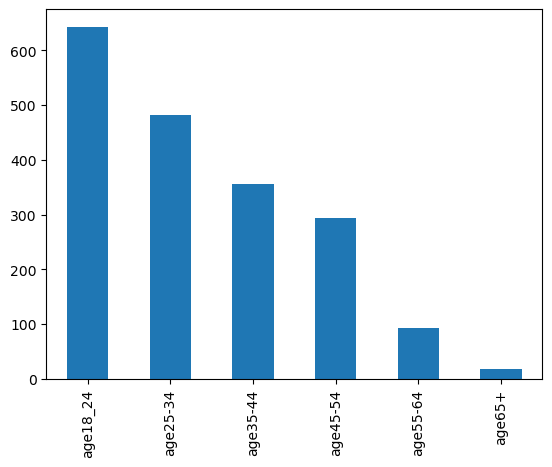

In [30]:
drug_1['Age'].value_counts().plot(kind="bar")

In [54]:
# Look at Gender
drug_1['Gender'].value_counts()

Male      943
Female    942
Name: Gender, dtype: int64

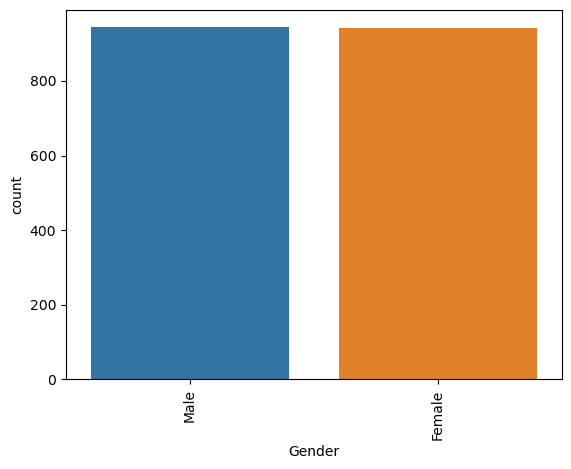

In [248]:
# Rotate xticklabels and order categories
g = sns.countplot(x='Gender', data=drug_1, order=['Male', 'Female'])
g.set_xticklabels(labels=['Male', 'Female'], rotation=90);

In [60]:
# Look at Education
# Include 'Education_level' to sort categories for bar chart
edu_count = drug_1[['Education', 'Education_level']].value_counts().reset_index(name='Count').sort_values(by='Education_level')
edu_count

Education  Education_level  Count
8       Left school before 16                1     28
5           Left school at 16                2     99
7           Left school at 17                3     30
4           Left school at 18                4    100
0  Some college but no degree                5    506
3    Professional certificate                6    270
1           University degree                7    480
2              Masters degree                8    283
6            Doctorate degree                9     89

<AxesSubplot:xlabel='Education'>

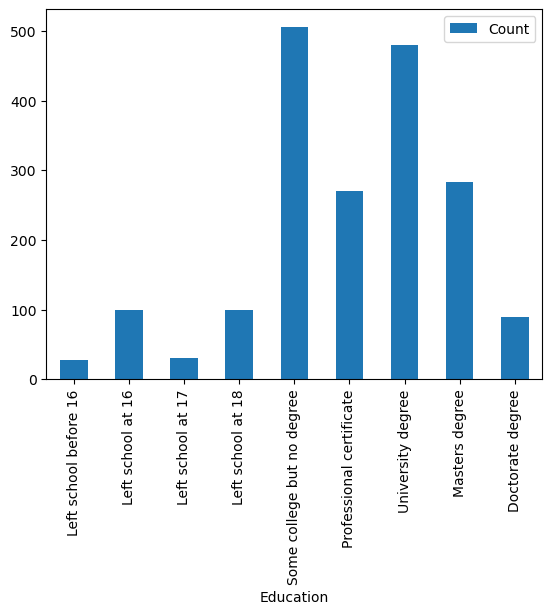

In [62]:
edu_count.plot(x='Education', y='Count', kind='bar')

In [48]:
# Group edu into 5 groups. 
mapping = {
    1:'No high school degree',
    2:'No high school degree',
    3:'No high school degree',
    4:'High school degree',
    5:'Some college experience',
    6:'Some college experience',
    7:'College degree',
    8:'Graduate degree', 
    9:'Graduate degree'
}
drug_1['Education_group'] = drug_1['Education_level'].map(mapping)
drug_1.columns

Index(['ID', 'Age_value', 'Gender_value', 'Education_value', 'Country_value',
       'Ethnicity_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
       'Impulsive', 'SS', 'Amyl', 'Cannabis', 'Age', 'Gender',
       'Education_level', 'Education', 'Country', 'Ethnicity', 'Age_level',
       'Amyl_binary', 'Amyl_user', 'Cannabis_binary', 'Cannabis_user',
       'Oscore_qcut', 'Education_group'],
      dtype='object')

In [51]:
edu_gr_count = drug_1['Education_group'].value_counts().reset_index()
edu_gr_count

index  Education_group
0  Some college experience              776
1           College degree              480
2          Graduate degree              372
3    No high school degree              157
4       High school degree              100

In [57]:
# Cast 'Education_group' into CategoricalDtype for DataFrame edu_g_count
from pandas.api.types import CategoricalDtype
cat_edu_gr_order = CategoricalDtype(['No high school degree', 'High school degree', 'Some college experience',
                                    'College degree', 'Graduate degree'], ordered=True)
edu_gr_count['index'] = edu_gr_count['index'].astype(cat_edu_gr_order)
edu_gr_count.sort_values('index')

index  Education_group
3    No high school degree              157
4       High school degree              100
0  Some college experience              776
1           College degree              480
2          Graduate degree              372

In [58]:
# Cast 'Education_group' into CategoricalDtype for DataFrame drug_1
drug_1['Education_group'] = drug_1['Education_group'].astype(cat_edu_gr_order)
drug_1['Education_group'].head()

0    Some college experience
1            Graduate degree
2    Some college experience
3            Graduate degree
4            Graduate degree
Name: Education_group, dtype: category
Categories (5, object): ['No high school degree' < 'High school degree' < 'Some college experience' < 'College degree' < 'Graduate degree']

In [59]:
drug_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 0 to 1884
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               1885 non-null   int64   
 1   Age_value        1885 non-null   float64 
 2   Gender_value     1885 non-null   float64 
 3   Education_value  1885 non-null   float64 
 4   Country_value    1885 non-null   float64 
 5   Ethnicity_value  1885 non-null   float64 
 6   Nscore           1885 non-null   float64 
 7   Escore           1885 non-null   float64 
 8   Oscore           1885 non-null   float64 
 9   Ascore           1885 non-null   float64 
 10  Cscore           1885 non-null   float64 
 11  Impulsive        1885 non-null   float64 
 12  SS               1885 non-null   float64 
 13  Amyl             1885 non-null   object  
 14  Cannabis         1885 non-null   object  
 15  Age              1885 non-null   object  
 16  Gender           1885 non-null   object  


In [63]:
# Look at Country
drug_1['Country'].value_counts()

UK                     1044
USA                     557
Other                   118
Canada                   87
Australia                54
Republic of Ireland      20
New Zealand               5
Name: Country, dtype: int64

<AxesSubplot:>

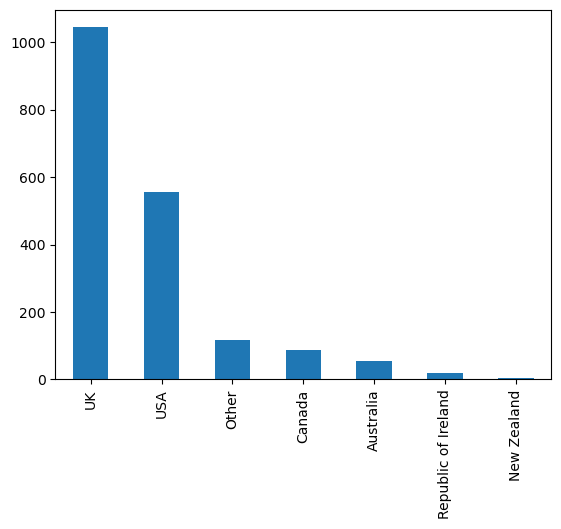

In [64]:
drug_1['Country'].value_counts().plot(kind="bar")

In [89]:
type(drug_1['Country'].value_counts())

pandas.core.series.Series

C:\Users\nguye\AppData\Local\Temp\ipykernel_11644\160113321.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drug_1['Country'].value_counts().index, rotation=90)


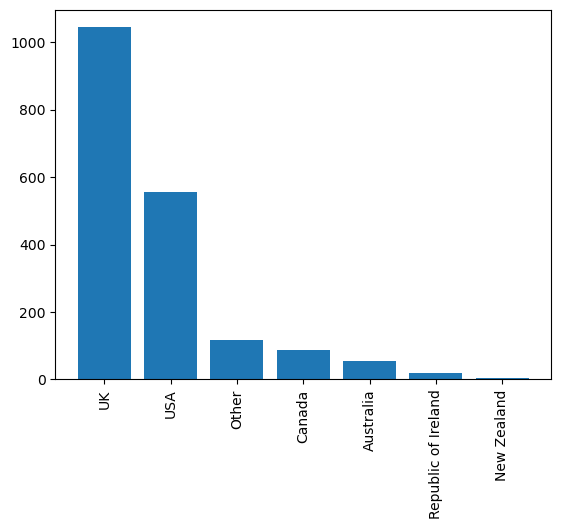

In [95]:
fig, ax = plt.subplots()
ax.bar(drug_1['Country'].value_counts().index, drug_1['Country'].value_counts())
ax.set_xticklabels(drug_1['Country'].value_counts().index, rotation=90)
plt.show()

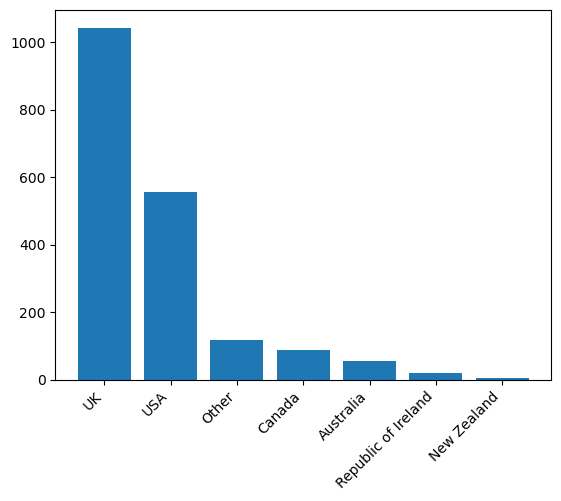

In [97]:
fig, ax = plt.subplots()
ax.bar(drug_1['Country'].value_counts().index, drug_1['Country'].value_counts())
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [65]:
# Look at Ethnicity
drug_1['Ethnicity'].value_counts()

White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Asian      20
Mixed-White/Black      20
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

In [29]:
# Look at personality features. These can be considered as either numerical and categorical.
drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].describe()
# Look like they have mean=0, std_dev=1, range from -3 to 3. 

Nscore       Escore       Oscore       Ascore       Cscore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.000047    -0.000163    -0.000534    -0.000245    -0.000386   
std       0.998106     0.997448     0.996229     0.997440     0.997523   
min      -3.464360    -3.273930    -3.273930    -3.464360    -3.464360   
25%      -0.678250    -0.695090    -0.717270    -0.606330    -0.652530   
50%       0.042570     0.003320    -0.019280    -0.017290    -0.006650   
75%       0.629670     0.637790     0.723300     0.760960     0.584890   
max       3.273930     3.273930     2.901610     3.464360     3.464360   

         Impulsive           SS  
count  1885.000000  1885.000000  
mean      0.007216    -0.003292  
std       0.954435     0.963701  
min      -2.555240    -2.078480  
25%      -0.711260    -0.525930  
50%      -0.217120     0.079870  
75%       0.529750     0.765400  
max       2.901610     1.921730

In [69]:
# Count number of unique values
drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].nunique()

Nscore       49
Escore       42
Oscore       35
Ascore       41
Cscore       41
Impulsive    10
SS           11
dtype: int64

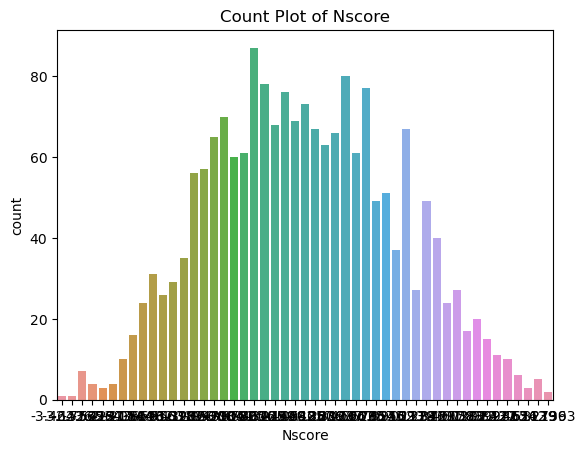

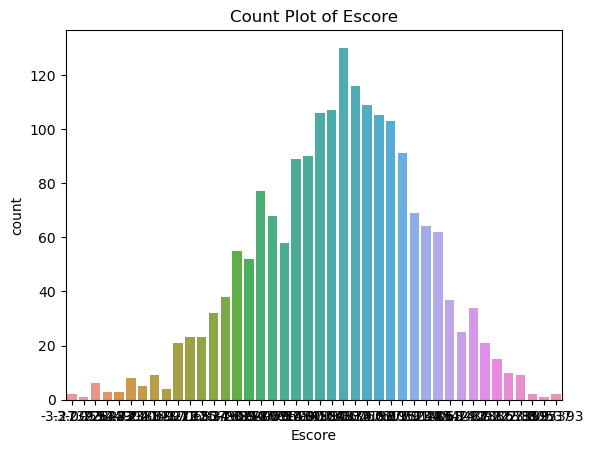

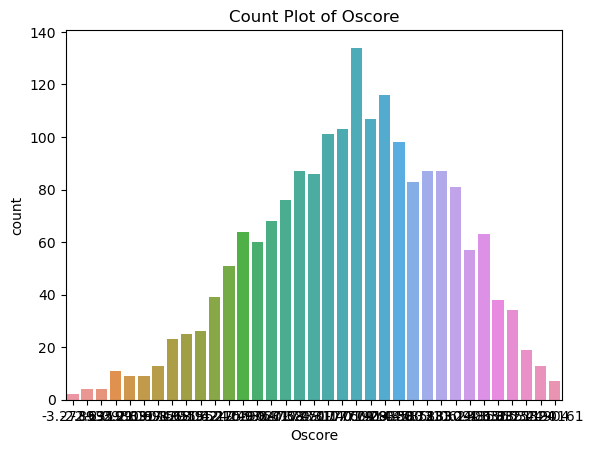

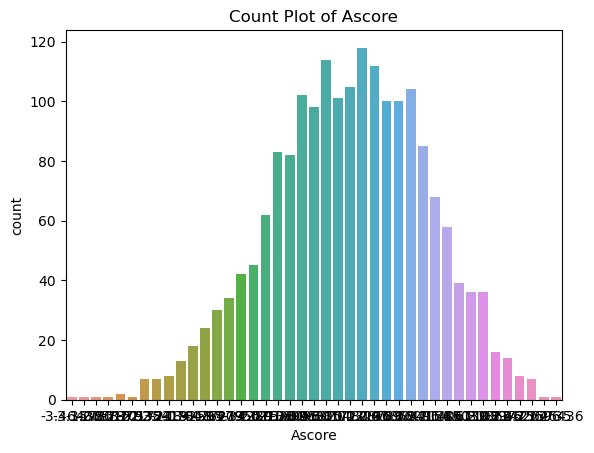

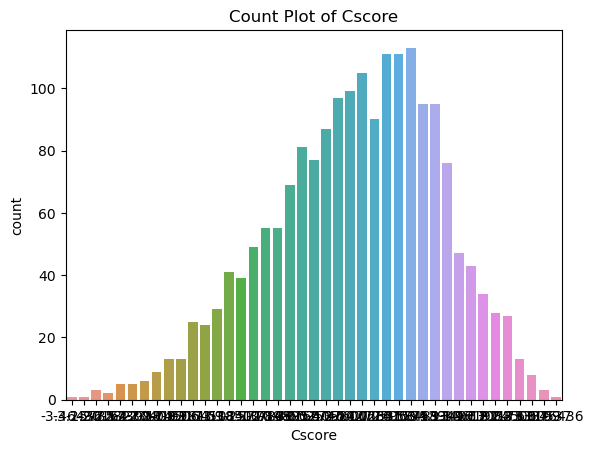

In [70]:
# Count plots of five score features
varlist = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']
for var in varlist:
    sns.countplot(x=var, data=drug_1)
    plt.title('Count Plot of ' + var)
    plt.show()

In [76]:
# Look at Impulsive
drug_1['Impulsive'].value_counts().sort_index()

-2.55524     20
-1.37983    276
-0.71126    307
-0.21712    355
 0.19268    257
 0.52975    216
 0.88113    195
 1.29221    148
 1.86203    104
 2.90161      7
Name: Impulsive, dtype: int64

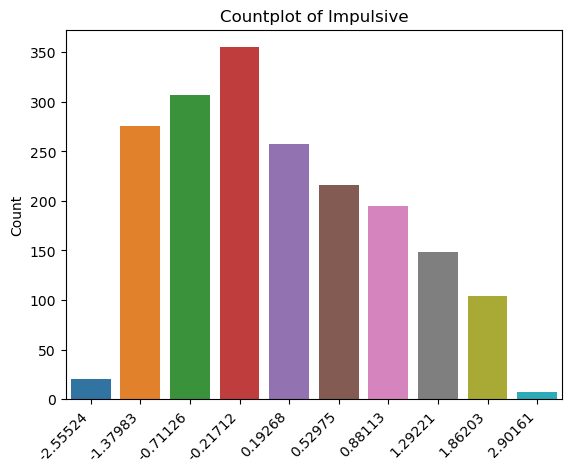

In [262]:
# Count plot for Impulsive
g = sns.countplot(x='Impulsive', data=drug_1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Countplot of Impulsive')
g.set(xlabel=None, ylabel='Count')
plt.show()

In [77]:
# Look at Impulsive
drug_1['SS'].value_counts().sort_index()

-2.07848     71
-1.54858     87
-1.18084    132
-0.84637    169
-0.52593    211
-0.21575    223
 0.07987    219
 0.40148    249
 0.76540    211
 1.22470    210
 1.92173    103
Name: SS, dtype: int64

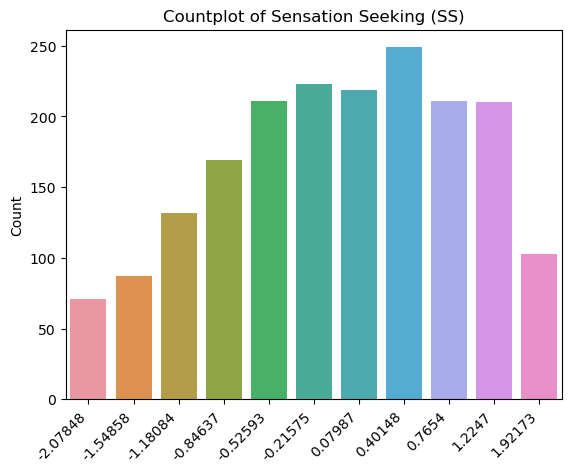

In [266]:
# Count plot for SS
g = sns.countplot(x='SS', data=drug_1)
# g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(rotation=45, horizontalalignment='right') # This is other way to rotate xtick
g.set_title('Countplot of Sensation Seeking (SS)')
g.set(xlabel=None, ylabel='Count')
plt.show()

In [85]:
type(g)

matplotlib.axes._subplots.AxesSubplot

In [30]:
# Check skewness
drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].skew()
# Impulsivenss: the sample lean toward low value. Skew positive.
# Sensation seeking: to sample lean toward high value. Skew positive

Nscore      -0.000059
Escore      -0.001738
Oscore      -0.010308
Ascore      -0.003897
Cscore      -0.005083
Impulsive    0.072795
SS          -0.040660
dtype: float64

### 3.2.2) Numerical variables
- Five features ('Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore') have many categories. We can consider them as numerical type. Let look explore them here.

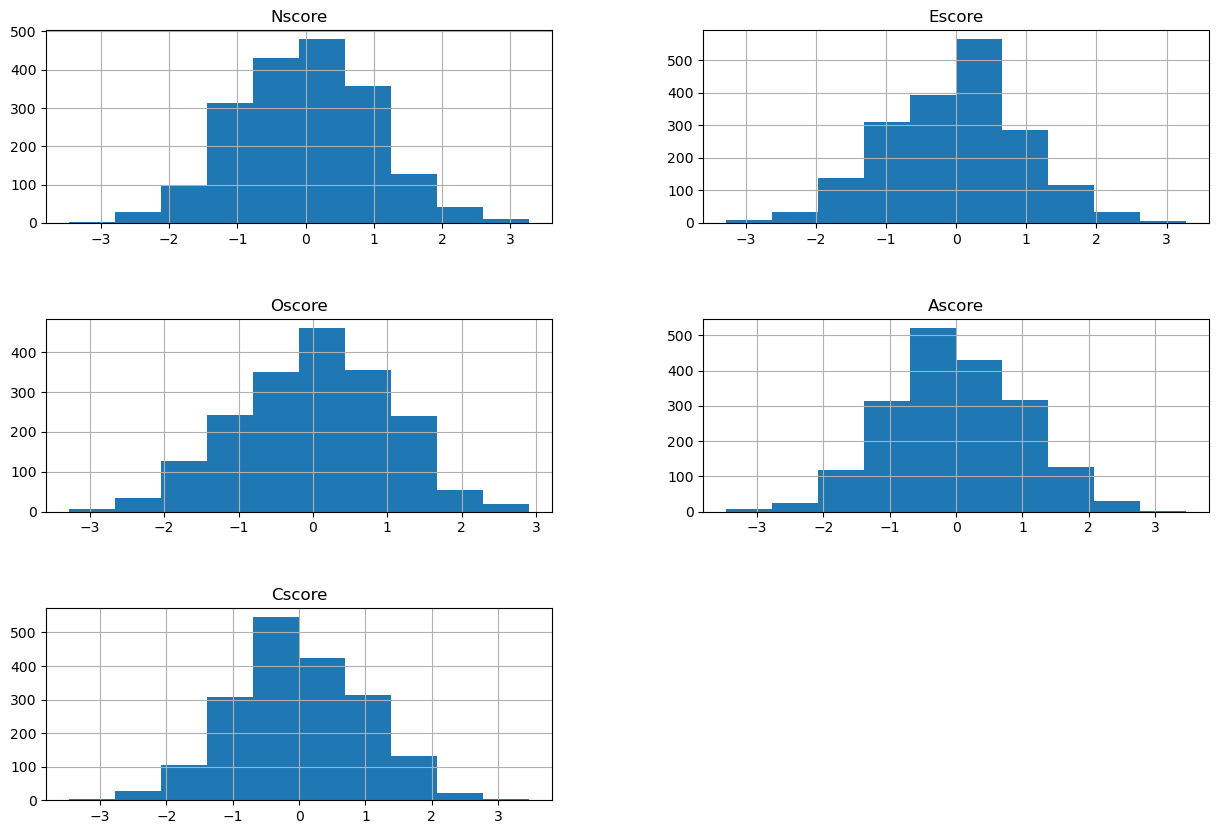

In [265]:
# Histogram
drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:>

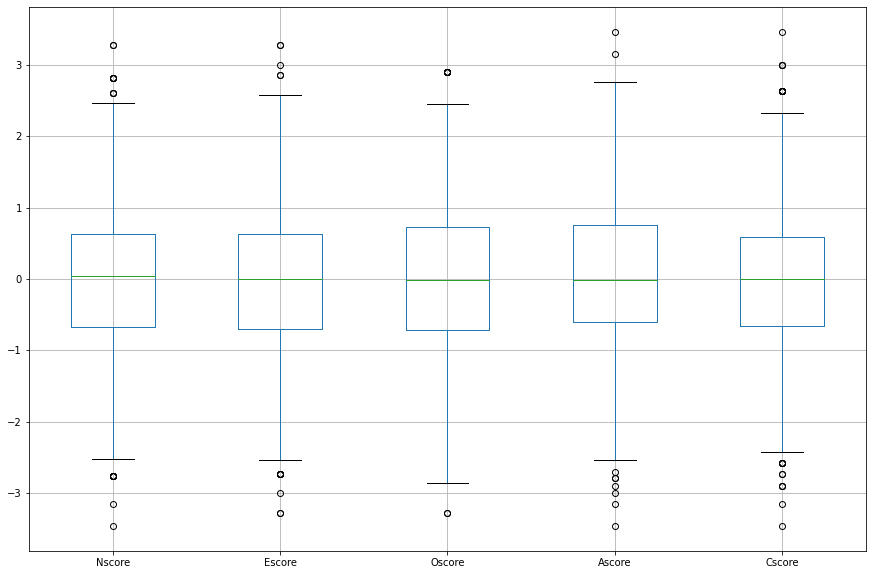

In [26]:
# Boxplot
drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']].boxplot(figsize=(15,10))
#plt.subplots_adjust(hspace=0.5);

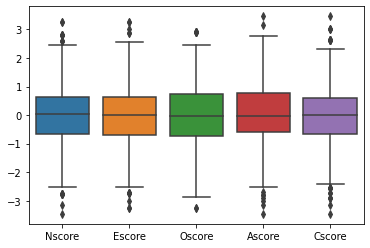

In [28]:
sns.boxplot(data=drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']]);

### 3.2.3) Target variables
- Originally, these variables have 7 categories. We have converted them into binary variables (User vs. Non-user).

#### 3.2.3.1) Target variables

In [39]:
drug_1['Amyl'].value_counts().sort_index()

CL0    1305
CL1     210
CL2     237
CL3      92
CL4      24
CL5      14
CL6       3
Name: Amyl, dtype: int64

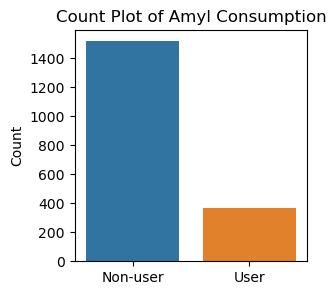

In [225]:
plt.figure(figsize=(3,3))
sns.countplot(x='Amyl_binary', data=drug_1)
plt.title('Count Plot of Amyl Consumption')
plt.xlabel('')
plt.ylabel('Count');

In [38]:
drug_1['Cannabis'].value_counts().sort_index()

CL0    413
CL1    207
CL2    266
CL3    211
CL4    140
CL5    185
CL6    463
Name: Cannabis, dtype: int64

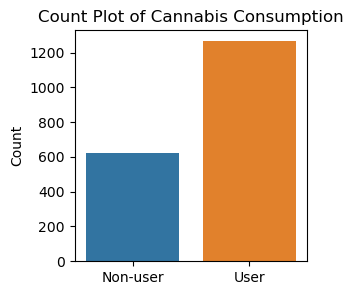

In [226]:
plt.figure(figsize=(3,3))
sns.countplot(x='Cannabis_binary', data=drug_1)
plt.title('Count Plot of Cannabis Consumption')
plt.xlabel('')
plt.ylabel('Count');

<AxesSubplot:>

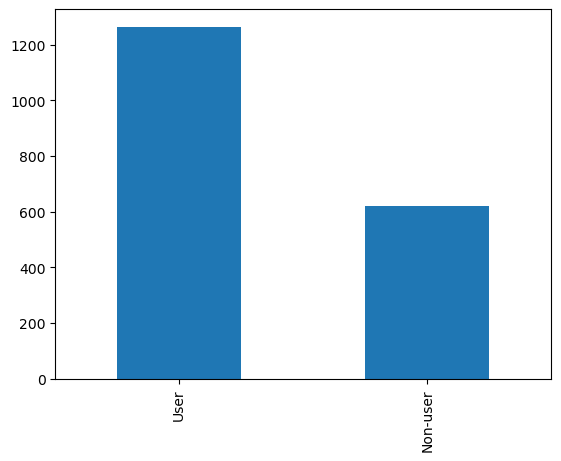

In [104]:
# Try to put the two above graphs into subplots
drug_1['Cannabis_binary'].value_counts().plot(kind='bar')
# Use pandas's build-in plot here, you get one blue colors. Need to learn how to change colors of bars.

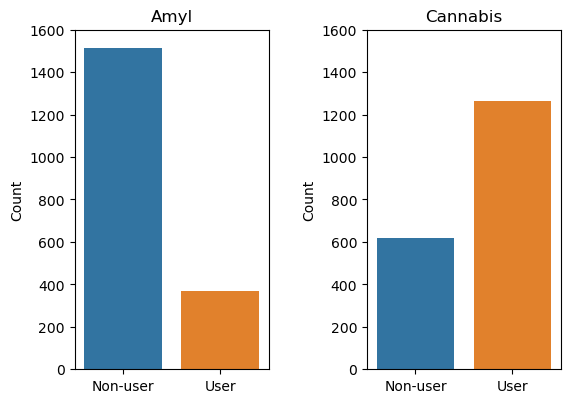

In [241]:
# Try to put the two above graphs into subplots
fig, axes = plt.subplots(1, 2)
fig.tight_layout(pad=4)
axes[0].set_ylim(top=1600)
axes[1].set_ylim(top=1600)
sns.countplot(x='Amyl_binary', data=drug_1, ax=axes[0])
sns.countplot(x='Cannabis_binary', data=drug_1, ax=axes[1])
axes[0].set(xlabel=None, ylabel='Count', title='Amyl')
axes[1].set(xlabel=None, ylabel='Count', title='Cannabis');

In [44]:
drug_1.Amyl_binary.value_counts()

Non-user    1515
User         370
Name: Amyl_binary, dtype: int64

In [45]:
drug_1.Amyl_binary.value_counts(normalize=True)

Non-user    0.803714
User        0.196286
Name: Amyl_binary, dtype: float64

In [46]:
drug_1.Cannabis_binary.value_counts()

User        1265
Non-user     620
Name: Cannabis_binary, dtype: int64

In [47]:
drug_1.Cannabis_binary.value_counts(normalize=True)

User        0.671088
Non-user    0.328912
Name: Cannabis_binary, dtype: float64

#### 3.2.3.2) Target variables across Gender

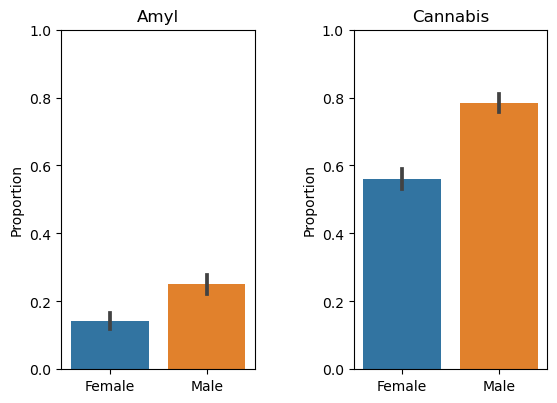

In [251]:
fig, axes = plt.subplots(1, 2)
fig.tight_layout(pad=4)
axes[0].set_ylim(top=1)
axes[1].set_ylim(top=1)
sns.barplot(data=drug_1, x='Gender', y='Amyl_user', ax=axes[0])
sns.barplot(data=drug_1, x='Gender', y='Cannabis_user', ax=axes[1])
axes[0].set(xlabel=None, ylabel='Proportion', title='Amyl')
axes[1].set(xlabel=None, ylabel='Proportion', title='Cannabis');

#### 3.2.3.3) Target variables across Country
Including:
- T-test to compare Amyl- and Cannabis-usage between US and UK.
- Calculate association b/w Amyl- and Cannabis-usage and categorical features ( ‘country’).

In [93]:
drug_1['Country'].value_counts(normalize=True)

UK                     0.553846
USA                    0.295491
Other                  0.062599
Canada                 0.046154
Australia              0.028647
Republic of Ireland    0.010610
New Zealand            0.002653
Name: Country, dtype: float64

In [92]:
drug_1[['Country', 'Amyl_user']].groupby('Country').agg(['count'])

Amyl_user
                        count
Country                      
Australia                  54
Canada                     87
New Zealand                 5
Other                     118
Republic of Ireland        20
UK                       1044
USA                       557

In [114]:
# Write a fucntion to do barplot
def plotbar(df, x_var, y_var, drug_name):
    sns.barplot(data=df, x=x_var, y=y_var)
    title = drug_name + " Consumption by " + x_var
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.title(title)

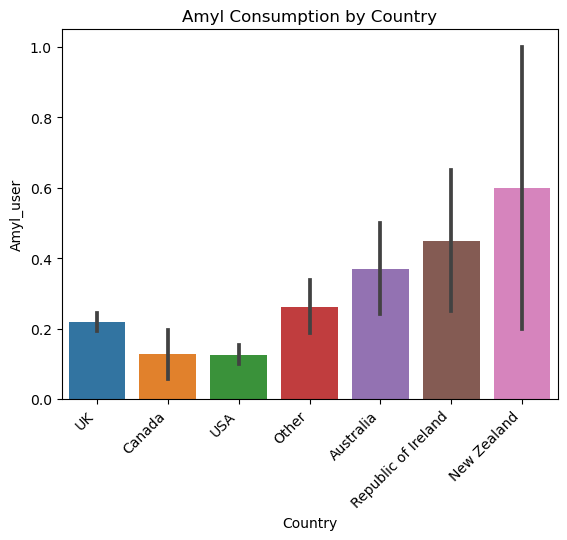

In [118]:
#plt.figure(figsize=(5,5))
plotbar(drug_1, 'Country', 'Amyl_user', 'Amyl')

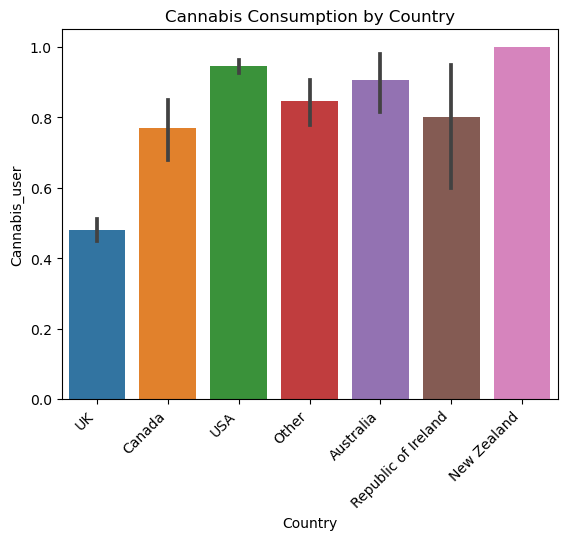

In [117]:
plotbar(drug_1, 'Country', 'Cannabis_user', 'Cannabis')

In [96]:
mean_usage = drug_1[['Country', 'Amyl_user', 'Cannabis_user']].groupby('Country').agg(['count','mean']).sort_values(by=('Amyl_user','mean'))
mean_usage

Amyl_user           Cannabis_user          
                        count      mean         count      mean
Country                                                        
USA                       557  0.123878           557  0.946140
Canada                     87  0.126437            87  0.770115
UK                       1044  0.217433          1044  0.479885
Other                     118  0.262712           118  0.847458
Australia                  54  0.370370            54  0.907407
Republic of Ireland        20  0.450000            20  0.800000
New Zealand                 5  0.600000             5  1.000000

We need to include sample count by country. Estimates of proportions of users are more reliable for countries with more samples. We can do this in two ways.
i) Use second y-axis (i.e. use twinx()) to include counts
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py
or https://github.com/rohanML/home_credit_default_risk/blob/master/notebooks/02_Exploratory_Data_Analysis.ipynb
ii) Include table with counts under the bar plot.
https://stackoverflow.com/questions/69391654/matplotlib-draw-a-table-below-the-bar-chart-label

I will do the second way.

In [ ]:
# Thanh can try to have the two graphs below side-by-side. Probably subplot 2x2. 
# Also to plot using seaborn to have more colors.
# But not now. Let use what we have now.  

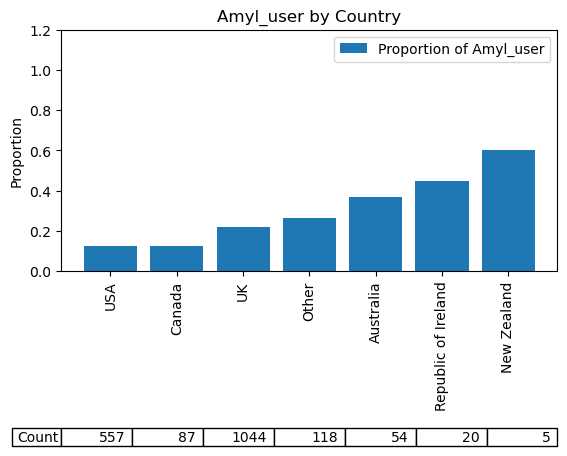

In [97]:
# Plot proportion of Amyl_users by country with sample count
fig, (ax, ax_table) = plt.subplots(nrows=2, gridspec_kw=dict(height_ratios=[3,1.5]))

ax_table.axis('off')
ax.set_ylim(top=1.2)
ax.bar(mean_usage.index, mean_usage['Amyl_user']['mean'], label='Proportion of Amyl_user')
ax.set_ylabel('Proportion')
ax.set_title('Amyl_user by Country')
ax.legend()
ax.tick_params(axis='x', labelrotation=90)

ax_table = plt.table(cellText=[mean_usage['Amyl_user']['count']], colLoc='center',
          rowLabels=['Count'], loc='bottom')

plt.subplots_adjust(bottom=0.05)
plt.show()

In [100]:
# Plot proportion of Cannabis_users by country with sample count
mean_usage.sort_values(by=('Cannabis_user','mean'), inplace=True)

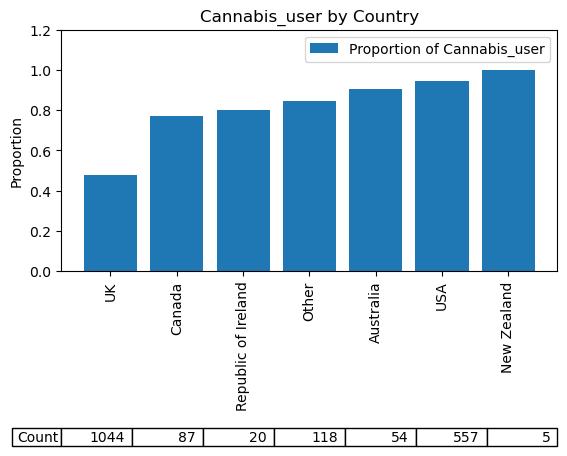

In [101]:
# Plot proportion of Cannabis_users by country with sample count

fig, (ax, ax_table) = plt.subplots(nrows=2, gridspec_kw=dict(height_ratios=[3,1.5]))

ax_table.axis('off')
ax.set_ylim(top=1.2)
ax.bar(mean_usage.index, mean_usage['Cannabis_user']['mean'], label='Proportion of Cannabis_user')
ax.set_ylabel('Proportion')
ax.set_title('Cannabis_user by Country')
ax.legend()
ax.tick_params(axis='x', labelrotation=90)

ax_table = plt.table(cellText=[mean_usage['Cannabis_user']['count']], colLoc='center',
          rowLabels=['Count'], loc='bottom')

plt.subplots_adjust(bottom=0.05)
plt.show()

#### T-test comparing Amyl, Cannabis usage b/w US and UK

In [139]:
# Do ttest comparing Amyl, Cannabis usage b/w US and UK
# Take USA group
group_us = drug_1[drug_1['Country'] == 'USA'][['Amyl_user', 'Cannabis_user']]
print(type(group_us))
print(group_us.shape)
group_us.head()

<class 'pandas.core.frame.DataFrame'>
(557, 2)


Amyl_user  Cannabis_user
6            0              0
34           0              1
37           1              1
118          0              0
298          0              0

In [140]:
# Take UK group
group_uk = drug_1[drug_1['Country'] == 'UK'][['Amyl_user', 'Cannabis_user']]
print(type(group_uk))
print(len(group_uk))
group_uk.head()

<class 'pandas.core.frame.DataFrame'>
1044


Amyl_user  Cannabis_user
0          0              0
1          1              1
2          0              1
3          0              1
4          0              1

In [141]:
# Compare Amyl usage
print('US', group_us['Amyl_user'].mean(), group_us['Amyl_user'].std())
print('UK', group_uk['Amyl_user'].mean(), group_uk['Amyl_user'].std())

US 0.12387791741472172 0.3297383519587754
UK 0.21743295019157088 0.4126972294190915


In [130]:
# Import ttest
from scipy.stats import ttest_ind

In [142]:
# Tttest assuming equal variance
ttest_ind(group_us['Amyl_user'], group_uk['Amyl_user'])

Ttest_indResult(statistic=-4.620599205572107, pvalue=4.13325007285767e-06)

In [144]:
# Tttest not assuming equal variance
ttest_ind(group_us['Amyl_user'], group_uk['Amyl_user'], equal_var=False)

Ttest_indResult(statistic=-4.942173118785805, pvalue=8.681783836135122e-07)

In [145]:
# Comparing Cannabis usage b/w US and UK
print('US', group_us['Cannabis_user'].mean(), group_us['Cannabis_user'].std())
print('UK', group_uk['Cannabis_user'].mean(), group_uk['Cannabis_user'].std())

US 0.9461400359066428 0.22594406688795782
UK 0.47988505747126436 0.49983466701485285


In [146]:
# Tttest assuming equal variance
ttest_ind(group_us['Cannabis_user'], group_uk['Cannabis_user'])

Ttest_indResult(statistic=20.903051349795426, pvalue=5.659778807297842e-86)

In [147]:
# Tttest not assuming equal variance
ttest_ind(group_us['Cannabis_user'], group_uk['Cannabis_user'], equal_var=False)

Ttest_indResult(statistic=25.629307245555704, pvalue=2.997264064426454e-121)

#### Categorical correlation b/w Country and the drug_usage

In [ ]:
# Calculate categorical correlation b/w Country and the drug_usage
# Among all our features, only 'Country' is Nominal variable

In [4]:
drug_1.head(5)

ID  Age_value  Gender_value  Education_value  Country_value  \
0   1    0.49788       0.48246         -0.05921        0.96082   
1   2   -0.07854      -0.48246          1.98437        0.96082   
2   3    0.49788      -0.48246         -0.05921        0.96082   
3   4   -0.95197       0.48246          1.16365        0.96082   
4   5    0.49788       0.48246          1.98437        0.96082   

   Ethnicity_value   Nscore   Escore   Oscore   Ascore  ...  Gender  \
0          0.12600  0.31287 -0.57545 -0.58331 -0.91699  ...  Female   
1         -0.31685 -0.67825  1.93886  1.43533  0.76096  ...    Male   
2         -0.31685 -0.46725  0.80523 -0.84732 -1.62090  ...    Male   
3         -0.31685 -0.14882 -0.80615 -0.01928  0.59042  ...  Female   
4         -0.31685  0.73545 -1.63340 -0.45174 -0.30172  ...  Female   

   Education_level                 Education Country          Ethnicity  \
0                6  Professional certificate      UK  Mixed-White/Asian   
1                9          Doctorate degree      UK              White   
2                6  Professional certificate      UK              White   
3                8            Masters degree      UK              White   
4                9          Doctorate degree      UK              White   

  Age_level Amyl_binary  Amyl_user Cannabis_binary Cannabis_user  
0         3    Non-user          0        Non-user             0  
1         2        User          1            User             1  
2         3    Non-user          0            User             1  
3         1    Non-user          0            User             1  
4         3    Non-user          0            User             1  

[5 rows x 26 columns]

In [6]:
confusion_matrix = pd.crosstab(drug_1['Country'], drug_1['Amyl_binary'])

In [7]:
confusion_matrix

Amyl_binary          Non-user  User
Country                            
Australia                  34    20
Canada                     76    11
New Zealand                 2     3
Other                      87    31
Republic of Ireland        11     9
UK                        817   227
USA                       488    69

In [8]:
chi2 = ss.chi2_contingency(confusion_matrix)[0]

In [10]:
chi2

51.161502705663565

In [15]:
n = confusion_matrix.sum().sum()
n

1885

In [16]:
phi2 = chi2/n
phi2

0.027141380745710115

In [17]:
r,k = confusion_matrix.shape
print(r, k)

7 2


In [18]:
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
phi2corr

0.023956667369913937

In [19]:
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
print(rcorr, kcorr)

6.980891719745223 1.9994692144373674


In [20]:
print(np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1))))

0.15482050890001084


In [21]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [23]:
print(cramers_v(drug_1['Country'], drug_1['Amyl_binary']))

0.15482050890001084


In [24]:
print(cramers_v(drug_1['Country'], drug_1['Cannabis_binary']))

0.45842706739247774


In [35]:
# Correlation of Age and Cannabis_user is -0.44. Let compare with cramers_v
print(cramers_v(drug_1['Age'], drug_1['Cannabis_binary']))
# Very nice, this is close.

0.4417994065173755


In [25]:
# Use scipy.stats.contingency
from scipy.stats.contingency import association

In [28]:
confusion_matrix

Amyl_binary          Non-user  User
Country                            
Australia                  34    20
Canada                     76    11
New Zealand                 2     3
Other                      87    31
Republic of Ireland        11     9
UK                        817   227
USA                       488    69

In [31]:
association(confusion_matrix, method="cramer", correction=False)
# This gives a little difference from our function.
# Thanh needs to dig deeper in here when have chance.

0.1647464134532528

In [41]:
# Do Theil's U
# Below we have the function to calculate Theil's U, but let try to do step by step outside of functional
# Code is taken from https://github.com/shakedzy/dython/blob/0046e1ca9b9a42ff1e35c359f9b85b0d2e011c61/dython/nominal.py
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [45]:
from collections import Counter
import math

In [48]:
# We need funtion conditional_entropy()
# Here Thanh modified the code to keep only argument x and y

def conditional_entropy (
    x,
    y,
#    nan_strategy=_REPLACE,
#    nan_replace_value=_DEFAULT_REPLACE_VALUE,
    log_base: float = math.e,
):

    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    log_base: float, default = e
        specifying base for calculating entropy. Default is base e.
    Returns:
    --------
    float
    """
#    if nan_strategy == _REPLACE:
# TN: I think this is another funciton       x, y = replace_nan_with_value(x, y, nan_replace_value)
#    elif nan_strategy == _DROP:
# TN: I think this is another funciton         x, y = remove_incomplete_samples(x, y)
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, log_base)
    return entropy

In [49]:
# Check conditional_entropy()
print(conditional_entropy(drug_1['Age'], drug_1['Cannabis_binary']))

1.407670854291386


In [50]:
# Check conditional_entropy() - how about reverse the two arguments to check for asymmetry
print(conditional_entropy(drug_1['Cannabis_binary'], drug_1['Age']))
# Great!

0.5282155291127252


In [ ]:
# Let do Theil's U step by step

In [51]:
s_xy = conditional_entropy(drug_1['Age'], drug_1['Cannabis_binary'])
s_xy

1.407670854291386

In [52]:
x_counter = Counter(drug_1['Age'])
x_counter

Counter({'age35-44': 356,
         'age25-34': 481,
         'age18_24': 643,
         'age65+': 18,
         'age45-54': 294,
         'age55-64': 93})

In [54]:
total_occurrences = sum(x_counter.values())
total_occurrences

1885

In [55]:
p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
p_x
# Python map() function https://www.geeksforgeeks.org/python-map-function/
# p_x is probability distribution of ages.

[0.18885941644562335,
 0.25517241379310346,
 0.3411140583554377,
 0.009549071618037135,
 0.1559681697612732,
 0.0493368700265252]

In [57]:
s_x = ss.entropy(p_x)
s_x

1.5128611100190132

In [58]:
(s_x - s_xy) / s_x
# This means very low association, only, 0.07.

0.06953067603562443

In [59]:
# define the function - Theil's U
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [60]:
# Calculate Theils_u
theils_u(drug_1['Age'], drug_1['Cannabis_binary'])
# I believe this is prediction 'Age' given 'Cannabis_binary' (x given y)

0.06953067603562443

In [61]:
# How about asymmetry
theils_u(drug_1['Cannabis_binary'], drug_1['Age'])
# Note correlation b/w Age_value and Cannabis_user is -0.44

0.16607087943495827

In [63]:
# Calculate Theils_u b/w Country and Amyl_binary 
print(theils_u(drug_1['Country'], drug_1['Amyl_binary']))
print(theils_u(drug_1['Amyl_binary'], drug_1['Country']))
# We should report the second one

0.011101139802459177
0.026197683751852906


In [64]:
# Calculate Theils_u b/w Country and Cannabis_binary 
print(theils_u(drug_1['Country'], drug_1['Cannabis_binary']))
print(theils_u(drug_1['Cannabis_binary'], drug_1['Country']))
# We should report the second one

0.10458080140532529
0.19295481482518592


In [66]:
# Try example from the article https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
x = ['A', 'A', 'A', 'B', 'B', 'B']
y = ['c', 'd', 'c', 'g', 'g', 'f']
print(theils_u(x, y))
print(theils_u(y, x))

1.0
0.52129602861432


#### 3.2.3.4) Target variables across Education groups

In [162]:
mean_usage = drug_1[['Education', 'Education_level', 'Amyl_user','Cannabis_user']] \
    .groupby('Education').agg({'Education_level':['count','mean'], 'Amyl_user':'mean','Cannabis_user':'mean'}) \
    .sort_values(by=('Education_level',  'mean')).reset_index()
mean_usage

Education Education_level      Amyl_user Cannabis_user
                                        count mean      mean          mean
0       Left school before 16              28  1.0  0.285714      0.714286
1           Left school at 16              99  2.0  0.202020      0.555556
2           Left school at 17              30  3.0  0.100000      0.766667
3           Left school at 18             100  4.0  0.170000      0.770000
4  Some college but no degree             506  5.0  0.205534      0.895257
5    Professional certificate             270  6.0  0.174074      0.574074
6           University degree             480  7.0  0.206250      0.608333
7              Masters degree             283  8.0  0.187279      0.501767
8            Doctorate degree              89  9.0  0.213483      0.539326

<AxesSubplot:xlabel='Education'>

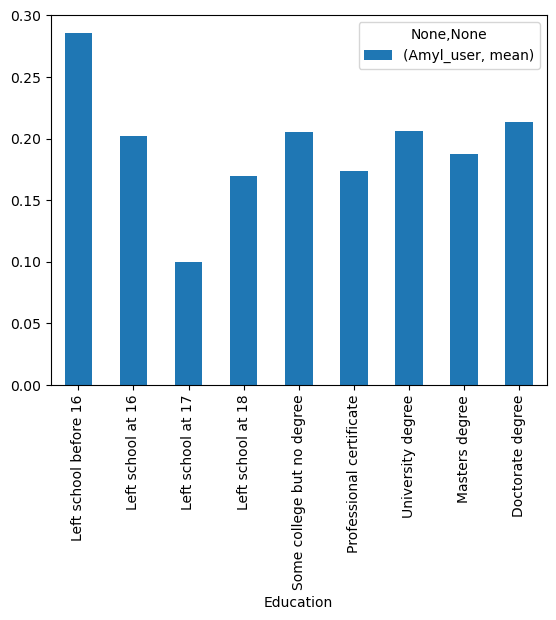

In [163]:
# plot Amyl_user vs Education
mean_usage.plot(x='Education', y=('Amyl_user',  'mean'), kind='bar')

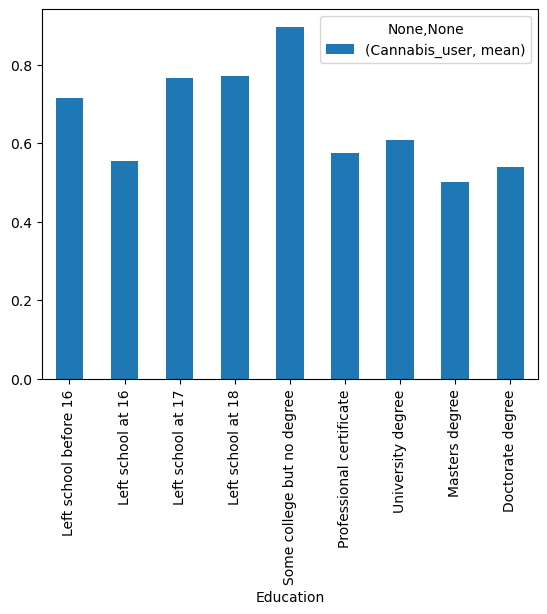

In [166]:
# plot Cannabis_user vs Education
mean_usage.plot(x='Education', y=('Cannabis_user',  'mean'), kind='bar');

In [65]:
# Look at Education_group instead of Education
mean_usage = drug_1[['Education_group', 'Amyl_user','Cannabis_user']] \
    .groupby('Education_group').agg({'Amyl_user':['count', 'mean'],'Cannabis_user':['count', 'mean']}).reset_index()
mean_usage

Education_group Amyl_user           Cannabis_user          
                               count      mean         count      mean
0    No high school degree       157  0.197452           157  0.624204
1       High school degree       100  0.170000           100  0.770000
2  Some college experience       776  0.194588           776  0.783505
3           College degree       480  0.206250           480  0.608333
4          Graduate degree       372  0.193548           372  0.510753

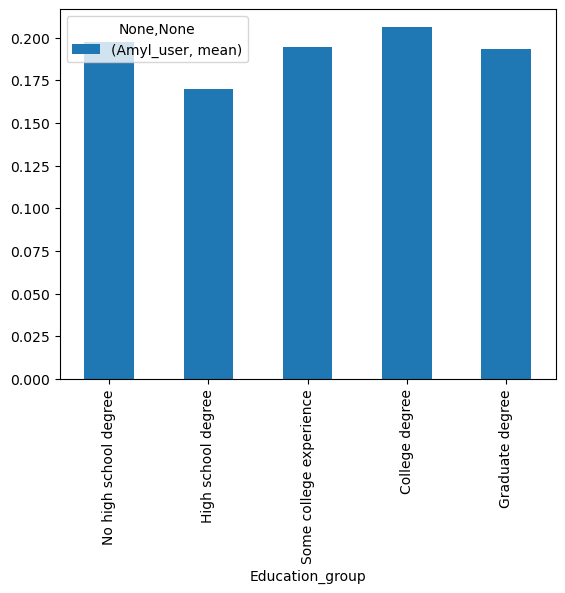

In [66]:
# plot Amyl_user vs Education_group
mean_usage.plot(x='Education_group', y=('Amyl_user',  'mean'), kind='bar');

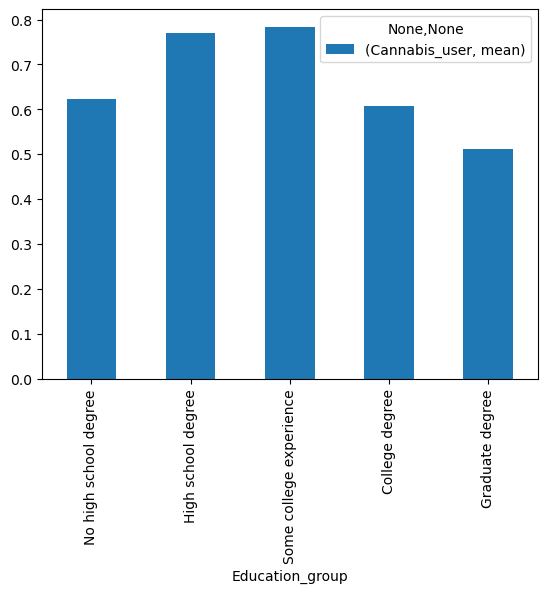

In [67]:
# plot Cannabis_user vs Education
mean_usage.plot(x='Education_group', y=('Cannabis_user',  'mean'), kind='bar');

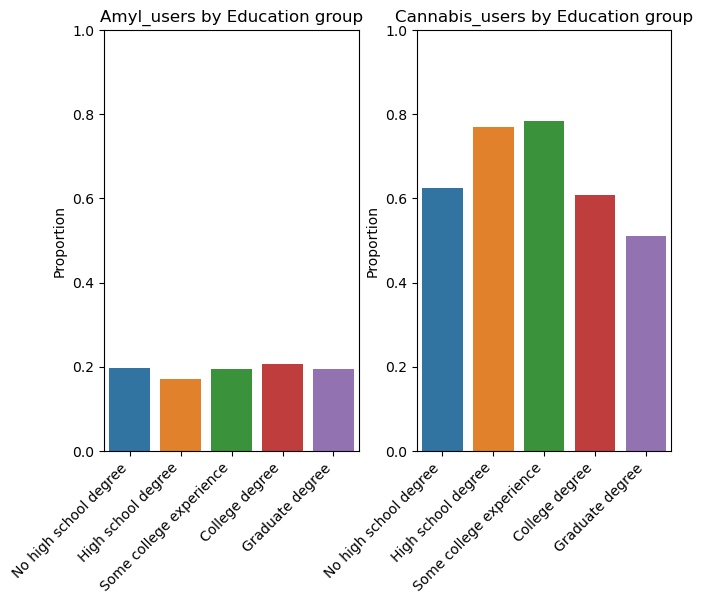

In [88]:
# Put the two graphs in subplots
fig, axes = plt.subplots(1, 2)
fig.tight_layout()
#fig.tight_layout(pad=2)
axes[0].set_ylim(top=1)
axes[1].set_ylim(top=1)
chart_1 = sns.barplot(data=mean_usage, x='Education_group', y=('Amyl_user', 'mean'), ax=axes[0])
chart_1.set_xticklabels(chart_1.get_xticklabels(), rotation=45, horizontalalignment='right')
chart_2 = sns.barplot(data=mean_usage, x='Education_group', y=('Cannabis_user', 'mean'), ax=axes[1])
chart_2.set_xticklabels(chart_2.get_xticklabels(), rotation=45, horizontalalignment='right')
axes[0].set(xlabel=None, ylabel='Proportion', title='Amyl_users by Education group')
axes[1].set(xlabel=None, ylabel='Proportion', title='Cannabis_users by Education group');

#### 3.2.3.5) Target variables across Age groups

In [255]:
mean_usage = drug_1[['Age', 'Age_level', 'Amyl_user','Cannabis_user']] \
    .groupby('Age').agg({'Age_level':['count','mean'], 'Amyl_user':'mean','Cannabis_user':'mean'}) \
    .sort_values(by=('Age_level',  'mean')).reset_index()
mean_usage

Age Age_level      Amyl_user Cannabis_user
                count mean      mean          mean
0  age18_24       643  1.0  0.241058      0.905132
1  age25-34       481  2.0  0.278586      0.713098
2  age35-44       356  3.0  0.134831      0.542135
3  age45-54       294  4.0  0.091837      0.370748
4  age55-64        93  5.0  0.064516      0.397849
5    age65+        18  6.0  0.000000      0.055556

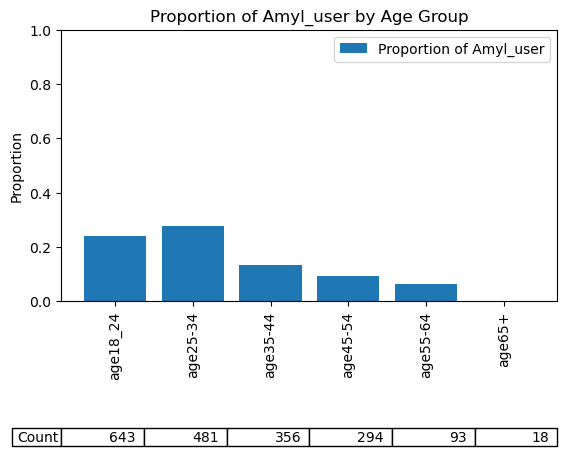

In [257]:
# Plot proportion of Amyl_users by Age_group with sample count
fig, (ax, ax_table) = plt.subplots(nrows=2, gridspec_kw=dict(height_ratios=[3,1]))

ax_table.axis('off')
ax.set_ylim(top=1)
ax.bar(mean_usage.Age, mean_usage['Amyl_user']['mean'], label='Proportion of Amyl_user')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Amyl_user by Age Group')
ax.legend()
ax.tick_params(axis='x', labelrotation=90)

ax_table = plt.table(cellText=[mean_usage['Age_level']['count']], colLoc='center',
          rowLabels=['Count'], loc='bottom')

plt.subplots_adjust(bottom=0.05)
plt.show()

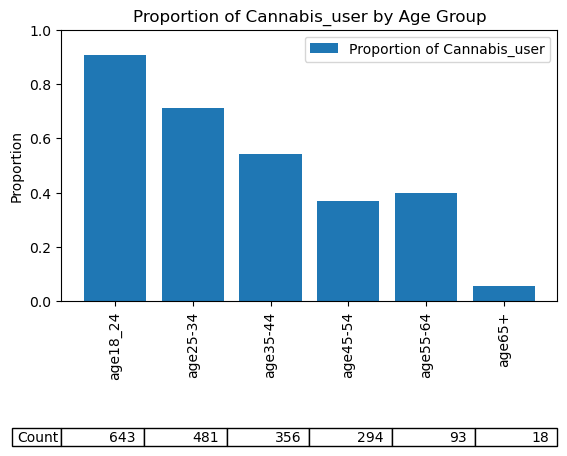

In [258]:
# # Plot proportion of Cannabis_users by Age_group with sample count
fig, (ax, ax_table) = plt.subplots(nrows=2, gridspec_kw=dict(height_ratios=[3,1]))

ax_table.axis('off')
ax.set_ylim(top=1)
ax.bar(mean_usage.Age, mean_usage['Cannabis_user']['mean'], label='Proportion of Cannabis_user')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Cannabis_user by Age Group')
ax.legend()
ax.tick_params(axis='x', labelrotation=90)

ax_table = plt.table(cellText=[mean_usage['Age_level']['count']], colLoc='center',
          rowLabels=['Count'], loc='bottom')

plt.subplots_adjust(bottom=0.05)
plt.show()

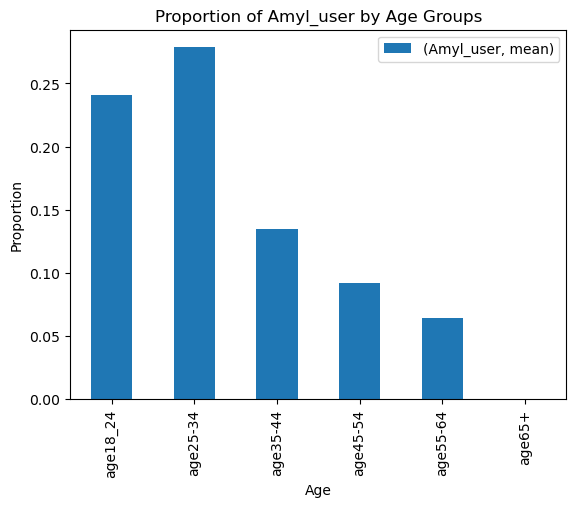

In [185]:
# Keep for reference
# plot Amyl_user vs Age
ax = mean_usage.plot(x='Age', y=('Amyl_user',  'mean'), kind='bar')
ax.set_title("Proportion of Amyl_user by Age Groups")
ax.set_ylabel("Proportion")
ax.legend(title='')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


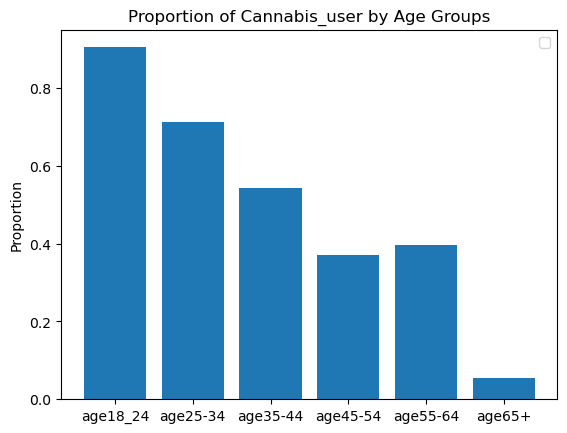

In [188]:
# Keep for reference
# plot Cannabis_user vs Age
fig, ax = plt.subplots()
ax.bar(x=mean_usage['Age'], height=mean_usage[('Cannabis_user',  'mean')])
ax.set_title("Proportion of Cannabis_user by Age Groups")
ax.set_ylabel("Proportion")
ax.legend(title='')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Cannabis_user'>

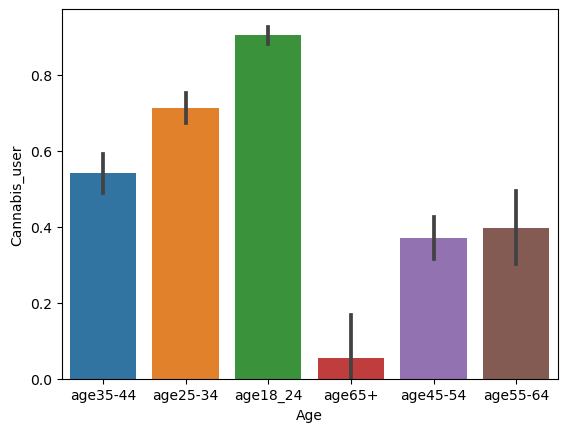

In [191]:
# Keep for reference
# Try Seaborn. 
sns.barplot(data=drug_1, x='Age', y='Cannabis_user')
# Look better; Seaborn do summary statistics for us; but here requires one more step = to reorder the age group.

#### 3.2.3.6) Association between Amyl and Cannabis usage

In [174]:
# Calculate Theils_u
theils_u(drug_1['Amyl_binary'], drug_1['Cannabis_binary'])

0.1087371238789939

In [175]:
# Calculate Theils_u
theils_u(drug_1['Cannabis_binary'], drug_1['Amyl_binary'])

0.08501316262904003

In [176]:
# Calculate Cramers_v
cramers_v(drug_1['Amyl_binary'], drug_1['Cannabis_binary'])

0.28970058985304525

## 3.3) Correlation

### 3.3.1) Correlation matrix and heatmap

In [3]:
col_list = ['Age_value', 'Gender_value', 'Education_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
       'Impulsive', 'SS', 'Amyl_user', 'Cannabis_user']

<AxesSubplot:>

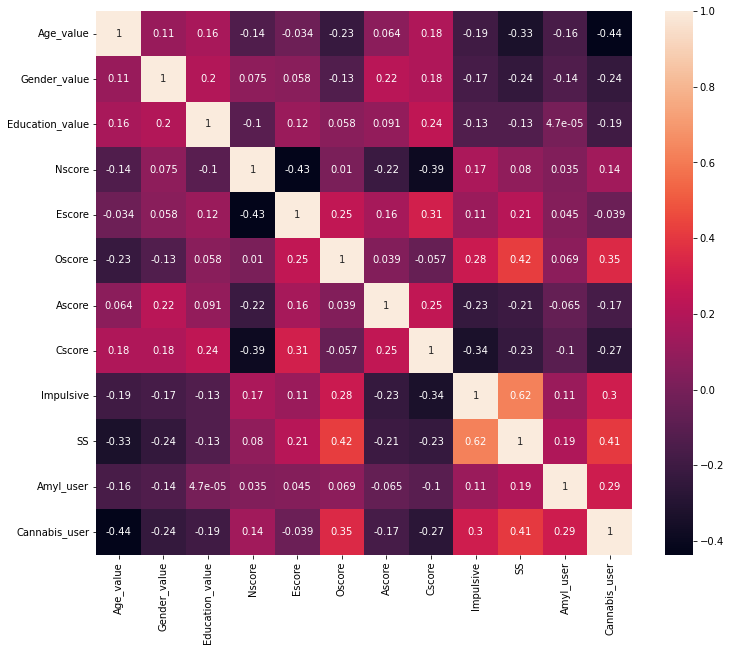

In [79]:
# Corrlation headmap
plt.subplots(figsize=(12,10))
sns.heatmap(drug_1[col_list].corr(), annot=True)

In [42]:
# Find the min of correlation
drug_1[col_list].corr().min().round(2)

Age_value         -0.44
Gender_value      -0.24
Education_value   -0.19
Nscore            -0.43
Escore            -0.43
Oscore            -0.23
Ascore            -0.23
Cscore            -0.39
Impulsive         -0.34
SS                -0.33
Amyl_user         -0.16
Cannabis_user     -0.44
dtype: float64

In [47]:
# Find the max of correlation (excluding 1)
corr = drug_1[col_list].corr()
corr[corr < 1].max().round(2)

Age_value          0.18
Gender_value       0.22
Education_value    0.24
Nscore             0.17
Escore             0.31
Oscore             0.42
Ascore             0.25
Cscore             0.31
Impulsive          0.62
SS                 0.62
Amyl_user          0.29
Cannabis_user      0.41
dtype: float64

<AxesSubplot:>

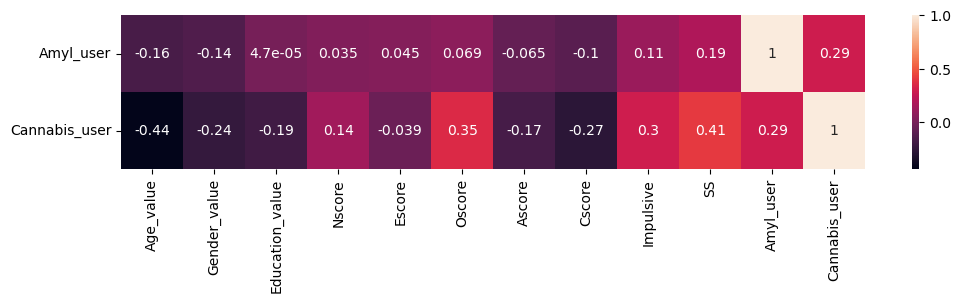

In [37]:
# Plot only two rows for Amyl_user and Cannabis_user from the correlation matrix
plt.subplots(figsize=(12,2))
sns.heatmap(drug_1[col_list].corr().iloc[10:, :], annot=True)

In [87]:
# Correlation matrix
drug_1[col_list].corr().round(2)

Age_value  Gender_value  Education_value  Nscore  Escore  \
Age_value             1.00          0.11             0.16   -0.14   -0.03   
Gender_value          0.11          1.00             0.20    0.07    0.06   
Education_value       0.16          0.20             1.00   -0.10    0.12   
Nscore               -0.14          0.07            -0.10    1.00   -0.43   
Escore               -0.03          0.06             0.12   -0.43    1.00   
Oscore               -0.23         -0.13             0.06    0.01    0.25   
Ascore                0.06          0.22             0.09   -0.22    0.16   
Cscore                0.18          0.18             0.24   -0.39    0.31   
Impulsive            -0.19         -0.17            -0.13    0.17    0.11   
SS                   -0.33         -0.24            -0.13    0.08    0.21   
Amyl_user            -0.16         -0.14             0.00    0.03    0.04   
Cannabis_user        -0.44         -0.24            -0.19    0.14   -0.04   

                 Oscore  Ascore  Cscore  Impulsive    SS  Amyl_user  \
Age_value         -0.23    0.06    0.18      -0.19 -0.33      -0.16   
Gender_value      -0.13    0.22    0.18      -0.17 -0.24      -0.14   
Education_value    0.06    0.09    0.24      -0.13 -0.13       0.00   
Nscore             0.01   -0.22   -0.39       0.17  0.08       0.03   
Escore             0.25    0.16    0.31       0.11  0.21       0.04   
Oscore             1.00    0.04   -0.06       0.28  0.42       0.07   
Ascore             0.04    1.00    0.25      -0.23 -0.21      -0.07   
Cscore            -0.06    0.25    1.00      -0.34 -0.23      -0.10   
Impulsive          0.28   -0.23   -0.34       1.00  0.62       0.11   
SS                 0.42   -0.21   -0.23       0.62  1.00       0.19   
Amyl_user          0.07   -0.07   -0.10       0.11  0.19       1.00   
Cannabis_user      0.35   -0.17   -0.27       0.30  0.41       0.29   

                 Cannabis_user  
Age_value                -0.44  
Gender_value             -0.24  
Education_value          -0.19  
Nscore                    0.14  
Escore                   -0.04  
Oscore                    0.35  
Ascore                   -0.17  
Cscore                   -0.27  
Impulsive                 0.30  
SS                        0.41  
Amyl_user                 0.29  
Cannabis_user             1.00

In [85]:
# Matrix for significane level of corr coefficient

# stackoverflow code
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(drug_1[col_list])

Age_value Gender_value Education_value  Nscore  Escore  \
Age_value             0.0          0.0             0.0     0.0  0.1418   
Gender_value          0.0          0.0             0.0  0.0012   0.012   
Education_value       0.0          0.0             0.0     0.0     0.0   
Nscore                0.0       0.0012             0.0     0.0     0.0   
Escore             0.1418        0.012             0.0     0.0     0.0   
Oscore                0.0          0.0          0.0118  0.6588     0.0   
Ascore             0.0058          0.0          0.0001     0.0     0.0   
Cscore                0.0          0.0             0.0     0.0     0.0   
Impulsive             0.0          0.0             0.0     0.0     0.0   
SS                    0.0          0.0             0.0  0.0005     0.0   
Amyl_user             0.0          0.0          0.9984  0.1297  0.0511   
Cannabis_user         0.0          0.0             0.0     0.0  0.0921   

                 Oscore  Ascore  Cscore Impulsive      SS Amyl_user  \
Age_value           0.0  0.0058     0.0       0.0     0.0       0.0   
Gender_value        0.0     0.0     0.0       0.0     0.0       0.0   
Education_value  0.0118  0.0001     0.0       0.0     0.0    0.9984   
Nscore           0.6588     0.0     0.0       0.0  0.0005    0.1297   
Escore              0.0     0.0     0.0       0.0     0.0    0.0511   
Oscore              0.0  0.0946  0.0136       0.0     0.0    0.0027   
Ascore           0.0946     0.0     0.0       0.0     0.0    0.0045   
Cscore           0.0136     0.0     0.0       0.0     0.0       0.0   
Impulsive           0.0     0.0     0.0       0.0     0.0       0.0   
SS                  0.0     0.0     0.0       0.0     0.0       0.0   
Amyl_user        0.0027  0.0045     0.0       0.0     0.0       0.0   
Cannabis_user       0.0     0.0     0.0       0.0     0.0       0.0   

                Cannabis_user  
Age_value                 0.0  
Gender_value              0.0  
Education_value           0.0  
Nscore                    0.0  
Escore                 0.0921  
Oscore                    0.0  
Ascore                    0.0  
Cscore                    0.0  
Impulsive                 0.0  
SS                        0.0  
Amyl_user                 0.0  
Cannabis_user             0.0

In [84]:
pearsonr(drug_1.Age_value, drug_1.Cannabis_user)

(-0.43638567054385957, 1.7534649803898296e-88)

In [86]:
# Correlation with asterisks
# stackoverflow code
rho = drug_1[col_list].corr()
pval = drug_1[col_list].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

Age_value Gender_value Education_value    Nscore    Escore  \
Age_value          1.0***      0.11***         0.16***  -0.14***     -0.03   
Gender_value      0.11***       1.0***          0.2***   0.07***    0.06**   
Education_value   0.16***       0.2***          1.0***   -0.1***   0.12***   
Nscore           -0.14***      0.07***         -0.1***    1.0***  -0.43***   
Escore              -0.03       0.06**         0.12***  -0.43***    1.0***   
Oscore           -0.23***     -0.13***          0.06**      0.01   0.25***   
Ascore            0.06***      0.22***         0.09***  -0.22***   0.16***   
Cscore            0.18***      0.18***         0.24***  -0.39***   0.31***   
Impulsive        -0.19***     -0.17***        -0.13***   0.17***   0.11***   
SS               -0.33***     -0.24***        -0.13***   0.08***   0.21***   
Amyl_user        -0.16***     -0.14***             0.0      0.03     0.04*   
Cannabis_user    -0.44***     -0.24***        -0.19***   0.14***    -0.04*   

                   Oscore    Ascore    Cscore Impulsive        SS Amyl_user  \
Age_value        -0.23***   0.06***   0.18***  -0.19***  -0.33***  -0.16***   
Gender_value     -0.13***   0.22***   0.18***  -0.17***  -0.24***  -0.14***   
Education_value    0.06**   0.09***   0.24***  -0.13***  -0.13***       0.0   
Nscore               0.01  -0.22***  -0.39***   0.17***   0.08***      0.03   
Escore            0.25***   0.16***   0.31***   0.11***   0.21***     0.04*   
Oscore             1.0***     0.04*   -0.06**   0.28***   0.42***   0.07***   
Ascore              0.04*    1.0***   0.25***  -0.23***  -0.21***  -0.07***   
Cscore            -0.06**   0.25***    1.0***  -0.34***  -0.23***   -0.1***   
Impulsive         0.28***  -0.23***  -0.34***    1.0***   0.62***   0.11***   
SS                0.42***  -0.21***  -0.23***   0.62***    1.0***   0.19***   
Amyl_user         0.07***  -0.07***   -0.1***   0.11***   0.19***    1.0***   
Cannabis_user     0.35***  -0.17***  -0.27***    0.3***   0.41***   0.29***   

                Cannabis_user  
Age_value            -0.44***  
Gender_value         -0.24***  
Education_value      -0.19***  
Nscore                0.14***  
Escore                 -0.04*  
Oscore                0.35***  
Ascore               -0.17***  
Cscore               -0.27***  
Impulsive              0.3***  
SS                    0.41***  
Amyl_user             0.29***  
Cannabis_user          1.0***

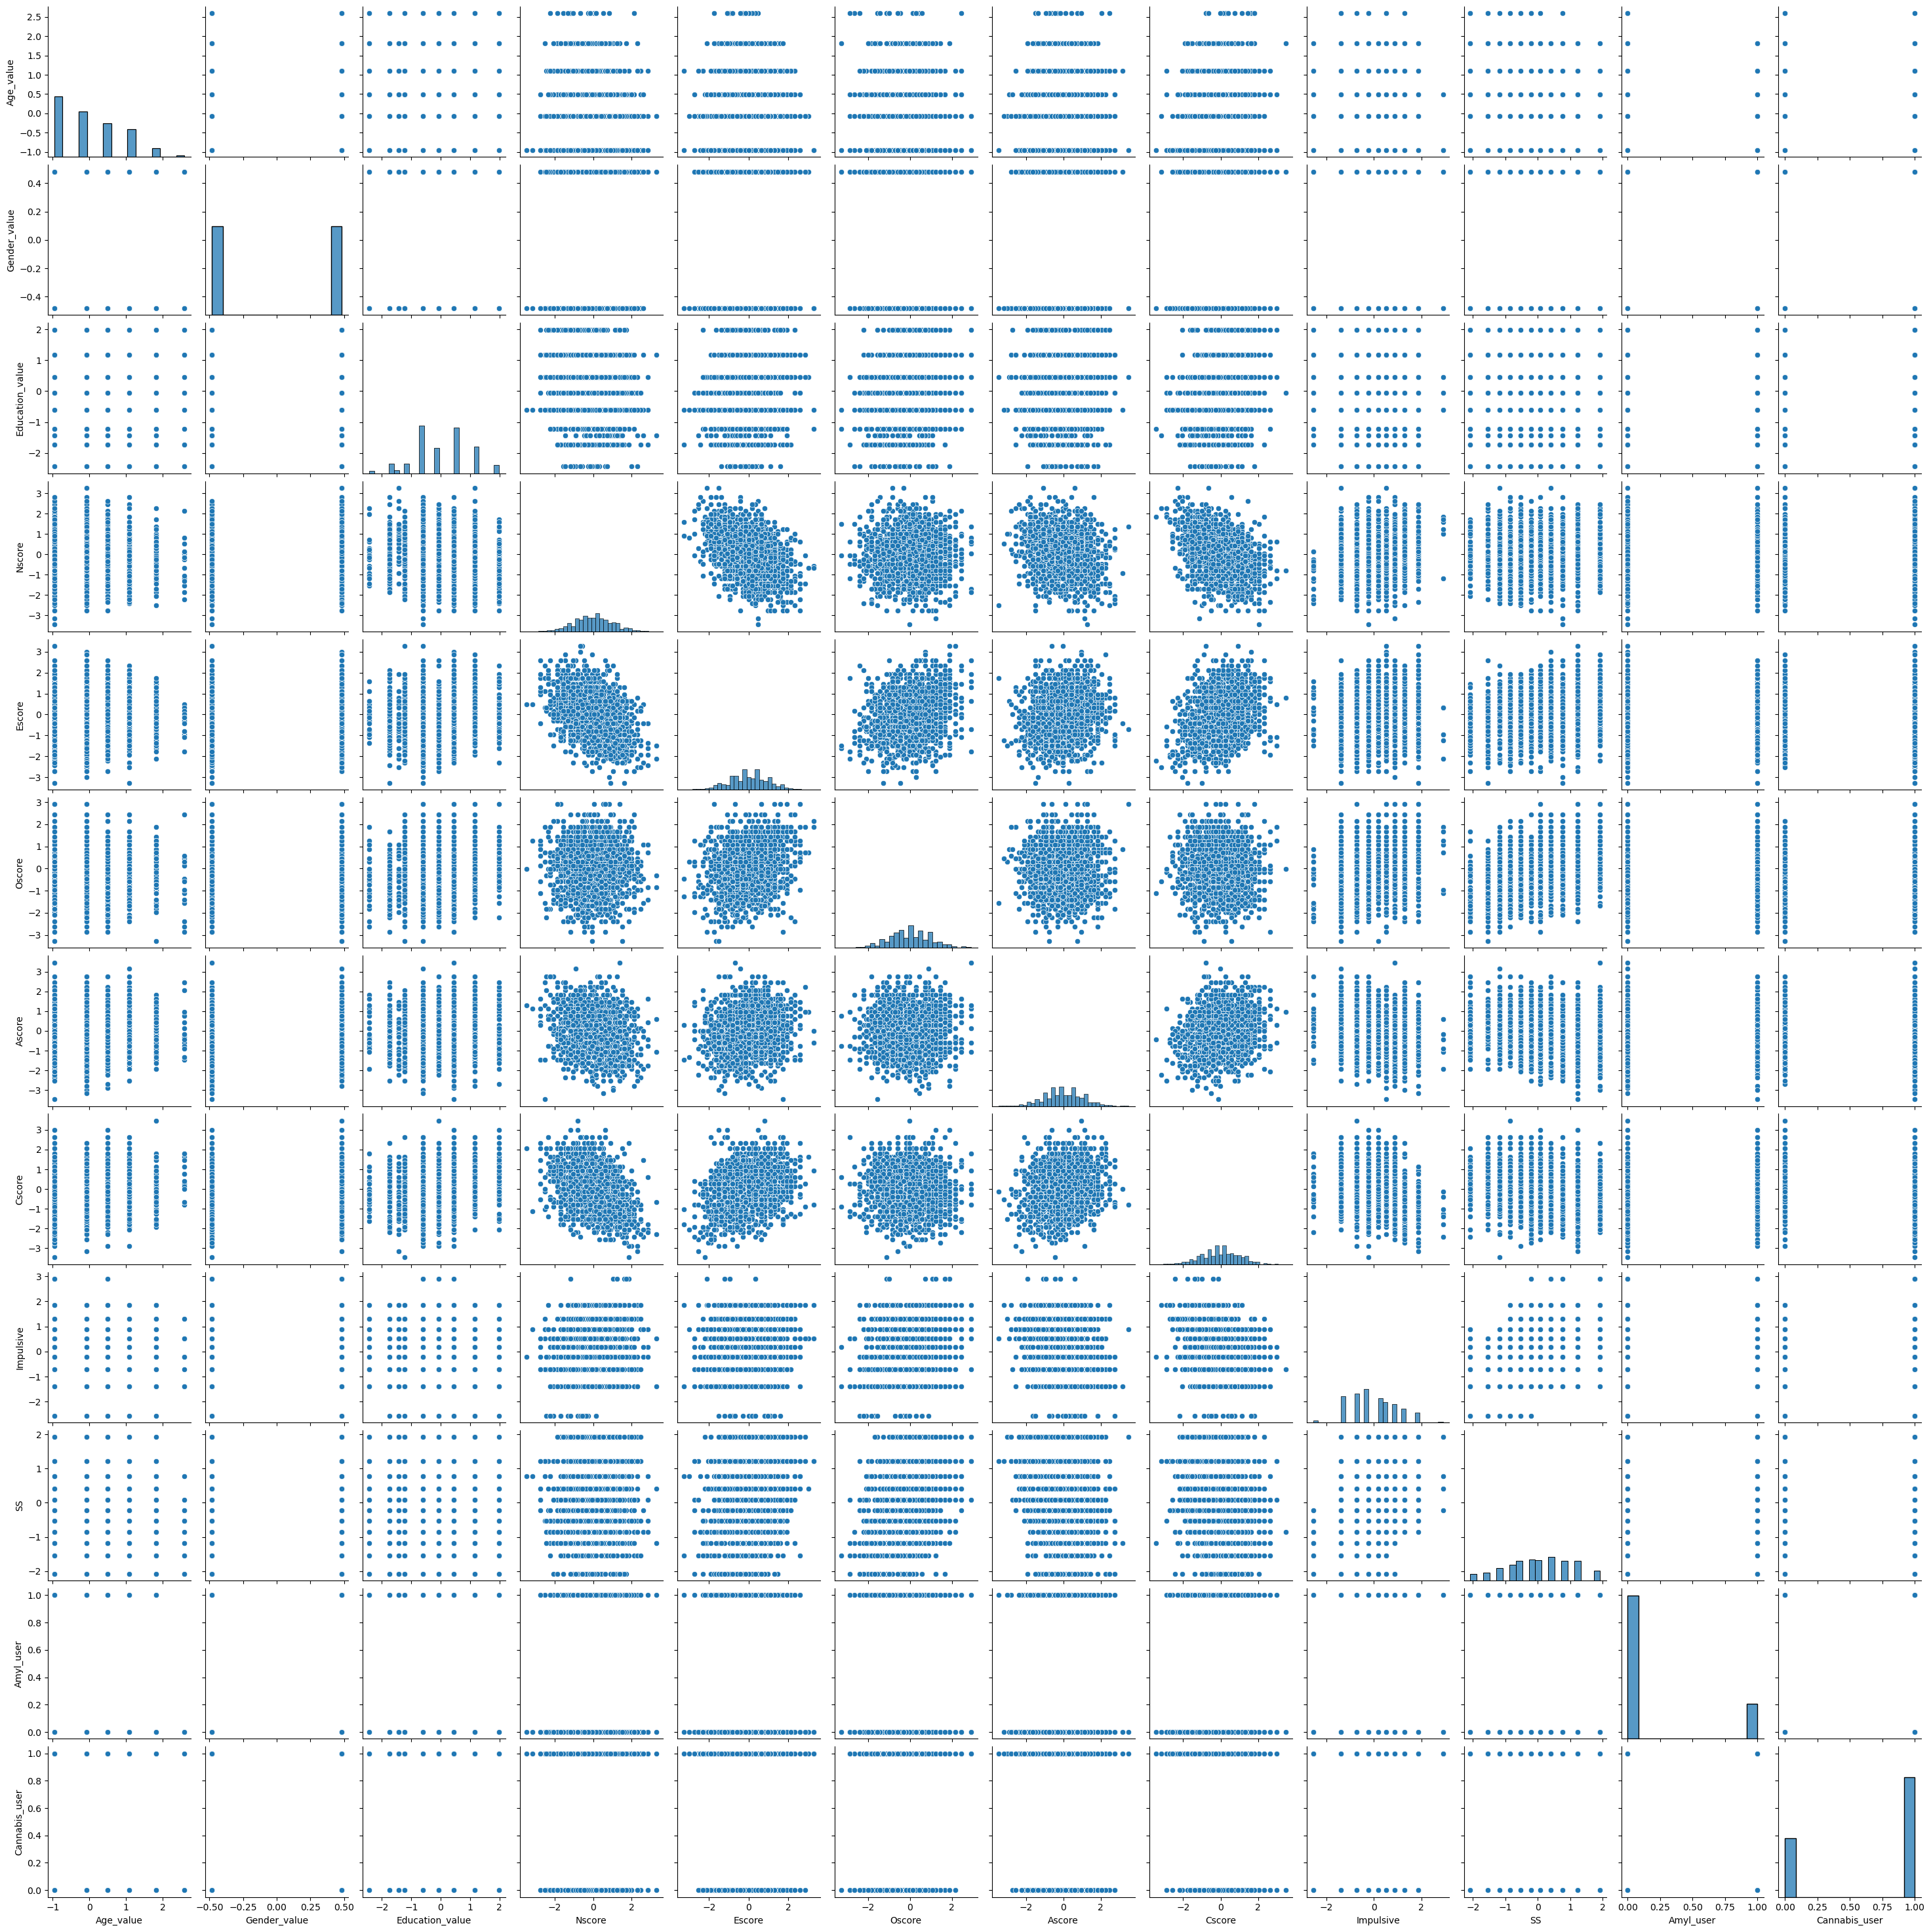

In [4]:
# sns.pairplot
sns.pairplot(drug_1[col_list])
# Not very usefull

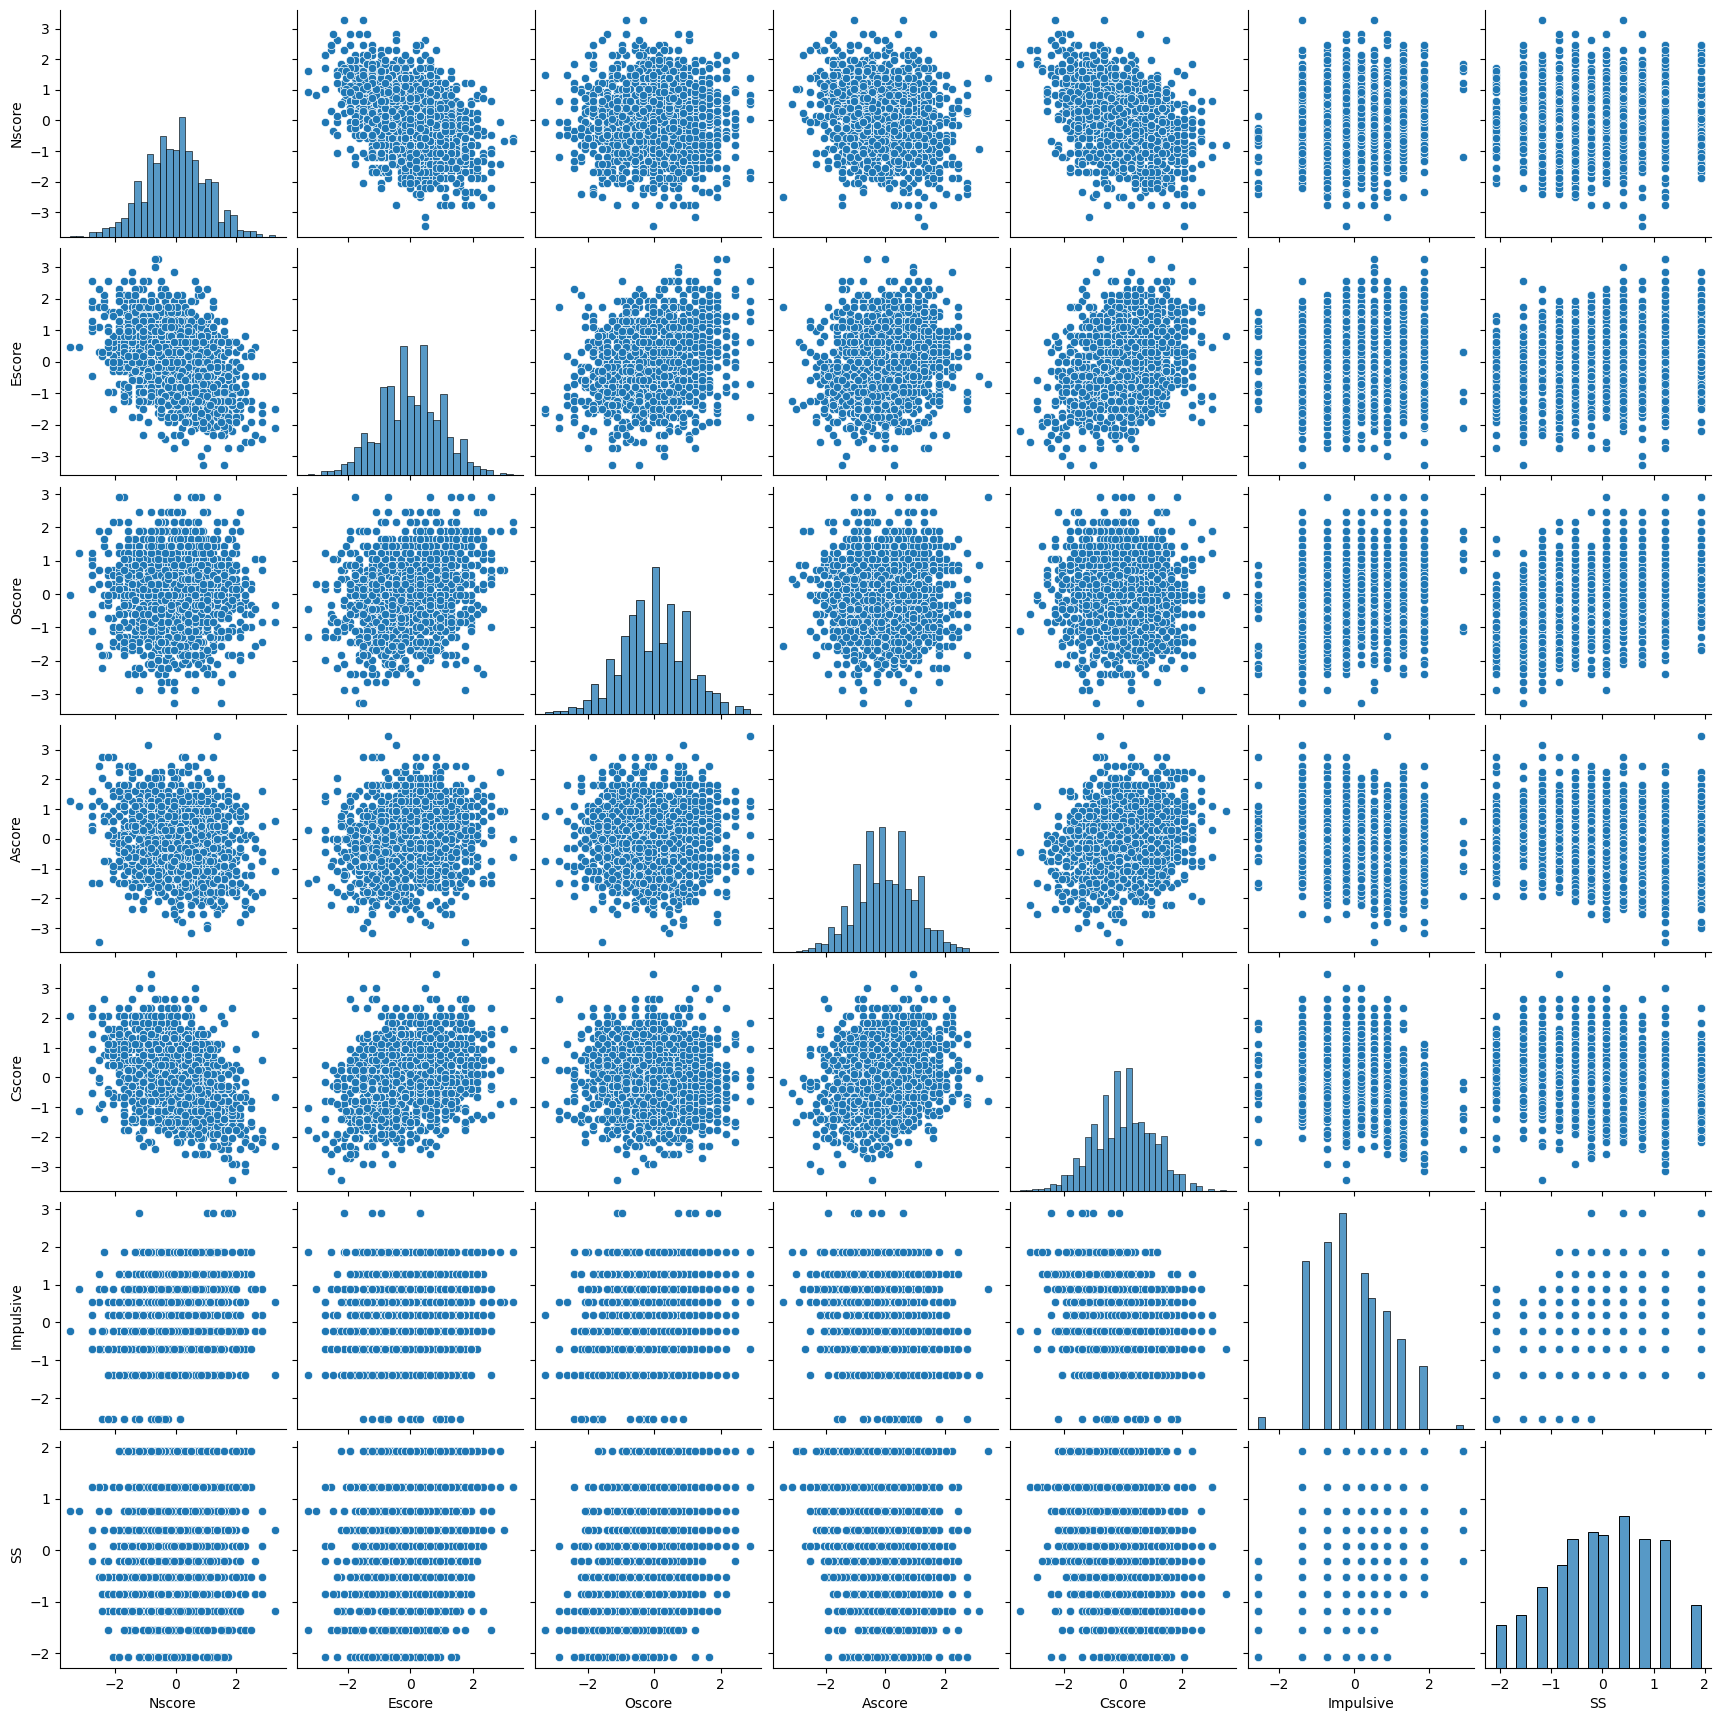

In [6]:
col_list_1 = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
sns.pairplot(drug_1[col_list_1])
# Correlation matrix is better

<AxesSubplot:>

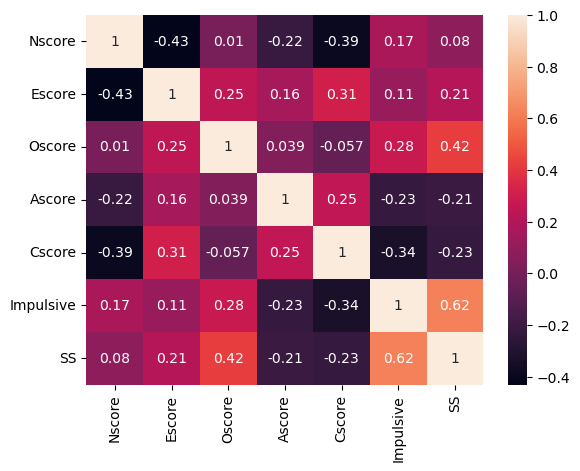

In [39]:
# Look at correlation among the seven personality traits
# Corrlation headmap
# plt.subplots(figsize=(12,10))
sns.heatmap(drug_1[col_list_1].corr(), annot=True)

### 3.3.2) Bivariate charts

#### 3.3.2.1) Distribution of features across drug_users and non_users

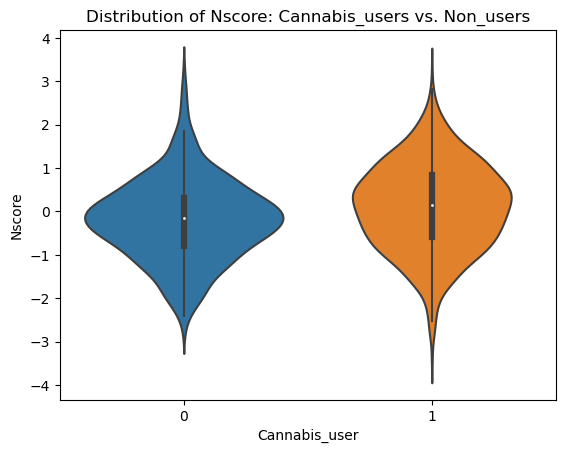

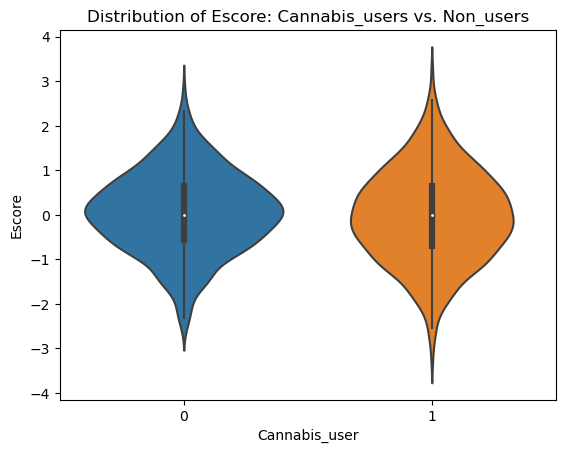

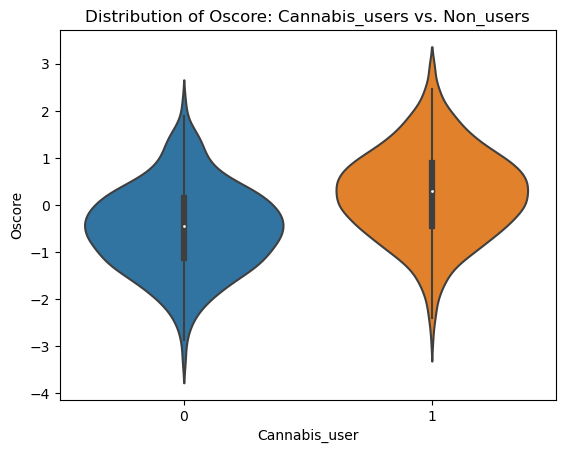

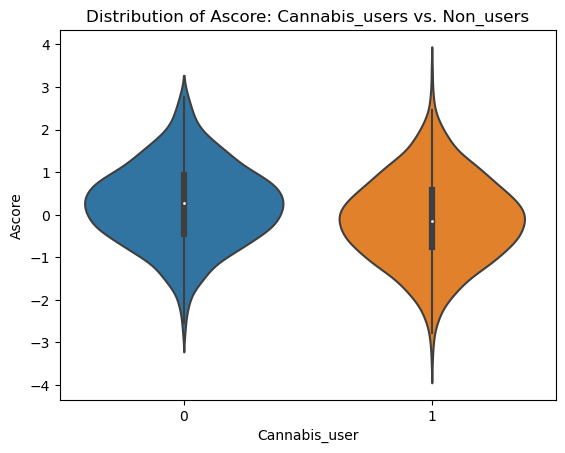

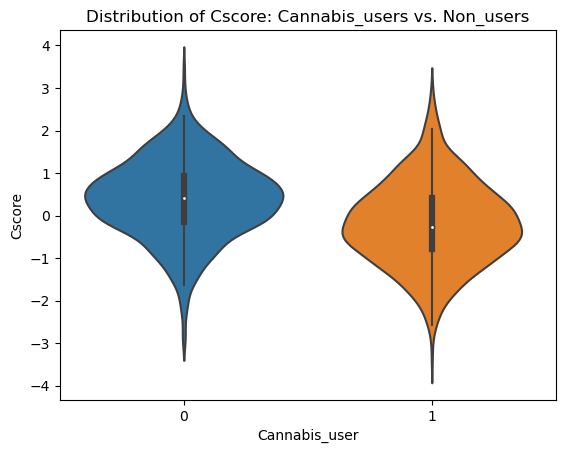

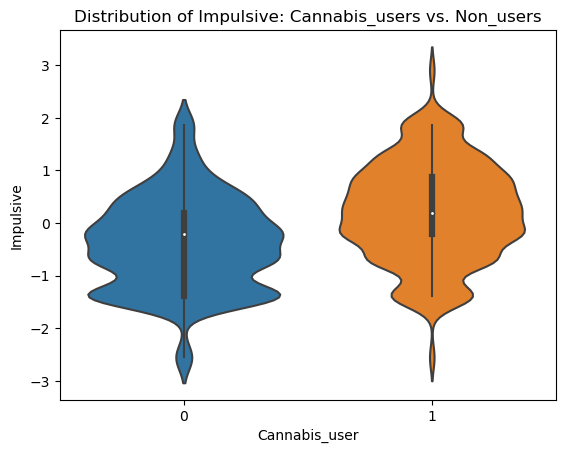

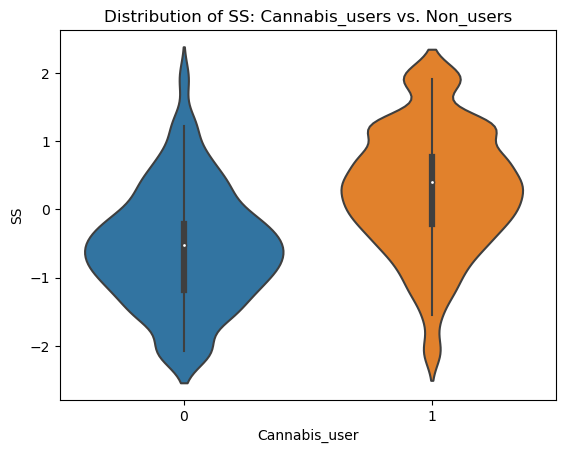

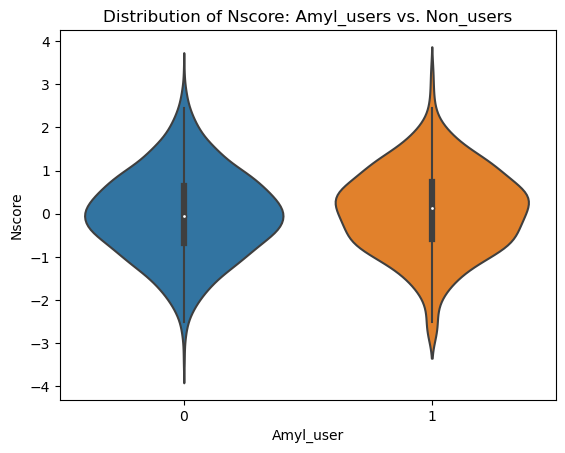

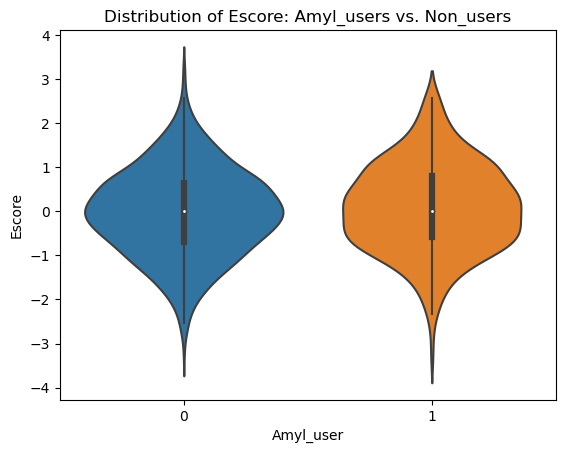

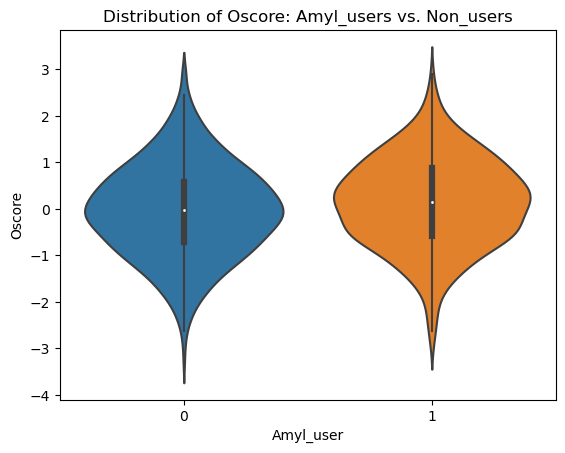

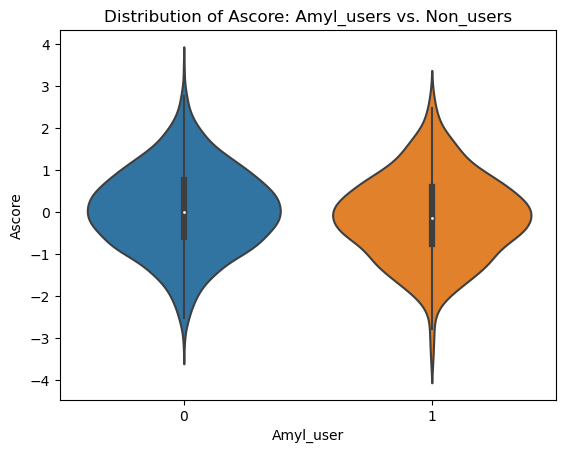

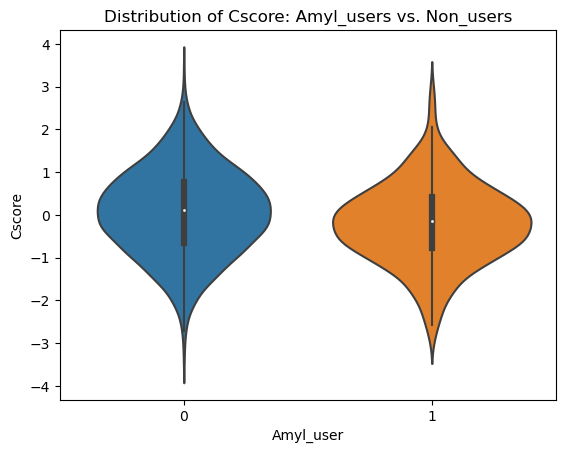

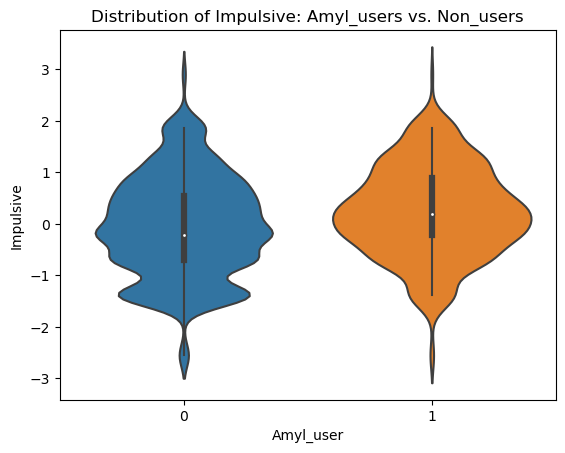

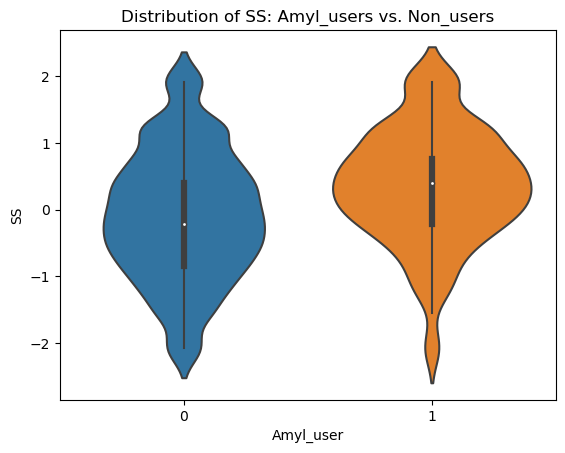

In [12]:
# Distribution of the personality variables for drug_user vs non-user
# col_list_1 = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
for drug in ['Cannabis_user', 'Amyl_user']:
    for var in col_list_1:
        sns.violinplot(x=drug, y=var, data=drug_1)
        title = 'Distribution of ' + var + ': ' + drug + 's vs. Non_users' 
        plt.title(title)
        plt.show()

<AxesSubplot:xlabel='Cannabis_user', ylabel='Oscore'>

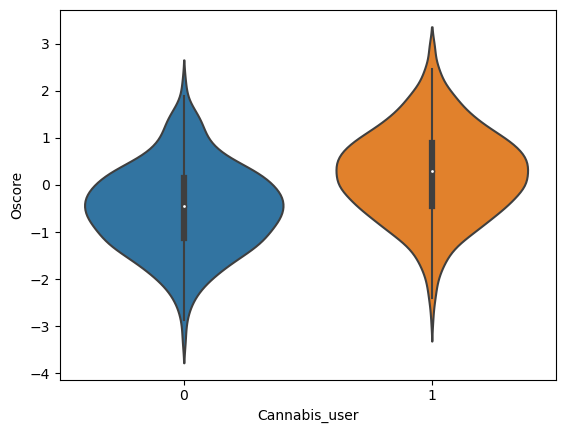

In [196]:
# add correlation to this graph for those you want to report/

sns.violinplot(x='Cannabis_user', y='Oscore', data=drug_1)

#### 3.3.2.2) Proportions of drug_users and features - quintile analysis 

In [27]:
def plot_qcut(var):
    var_qcut = var + '_qcut'
    temp_df = drug_1[[var, 'Amyl_user', 'Cannabis_user']]
    temp_df[var_qcut] = pd.qcut(temp_df[var], q=5, labels=np.arange(5))
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.tight_layout(pad=4)
    axes[0].set_ylim(top=1)
    axes[1].set_ylim(top=1)
    sns.barplot(data=temp_df, x=var_qcut, y='Amyl_user', ax=axes[0])
    sns.barplot(data=temp_df, x=var_qcut, y='Cannabis_user', ax=axes[1])
    axes[0].set(xlabel=(var + ' quintiles'), ylabel='Proportion', title='Proportion of Amyl users')
    axes[1].set(xlabel=(var + ' quintiles'), ylabel='Proportion', title='Proportion of Cannabis users');

C:\Users\nguye\AppData\Local\Temp\ipykernel_21492\3648929271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[var_qcut] = pd.qcut(temp_df[var], q=5, labels=np.arange(5))


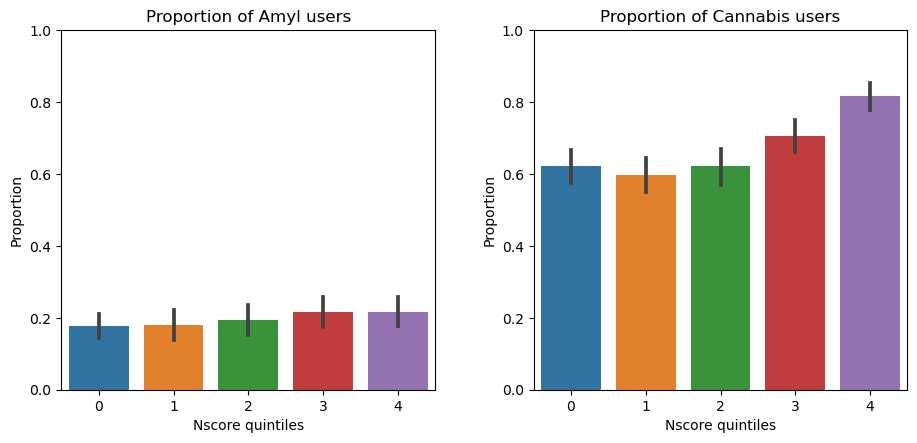

In [30]:
plot_qcut('Nscore')

C:\Users\nguye\AppData\Local\Temp\ipykernel_21492\3648929271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[var_qcut] = pd.qcut(temp_df[var], q=5, labels=np.arange(5))


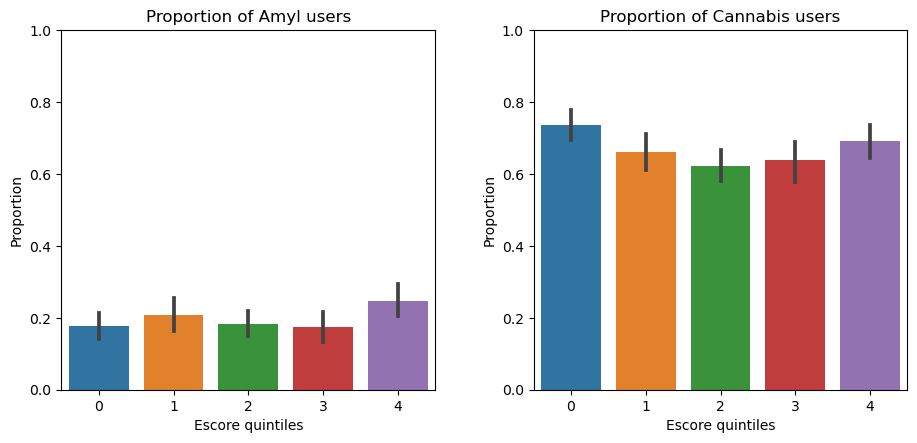

In [33]:
plot_qcut('Escore')

C:\Users\nguye\AppData\Local\Temp\ipykernel_21492\3648929271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[var_qcut] = pd.qcut(temp_df[var], q=5, labels=np.arange(5))


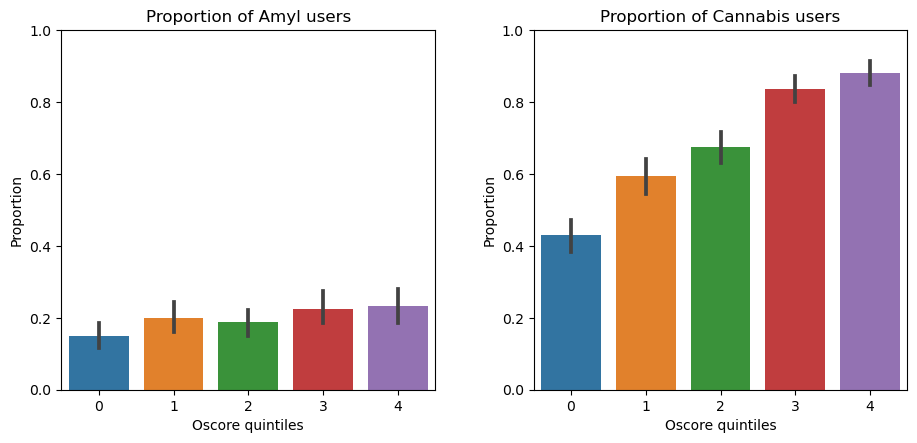

In [29]:
plot_qcut('Oscore')

C:\Users\nguye\AppData\Local\Temp\ipykernel_21492\3648929271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[var_qcut] = pd.qcut(temp_df[var], q=5, labels=np.arange(5))


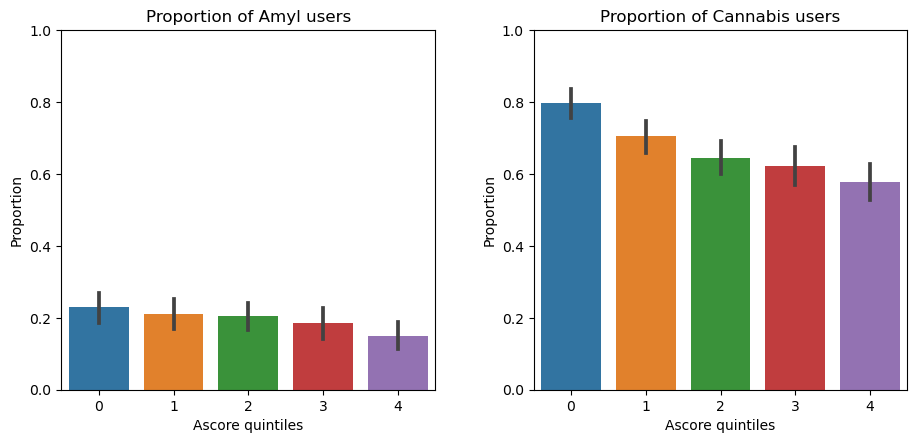

In [32]:
plot_qcut('Ascore')

C:\Users\nguye\AppData\Local\Temp\ipykernel_21492\3648929271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[var_qcut] = pd.qcut(temp_df[var], q=5, labels=np.arange(5))


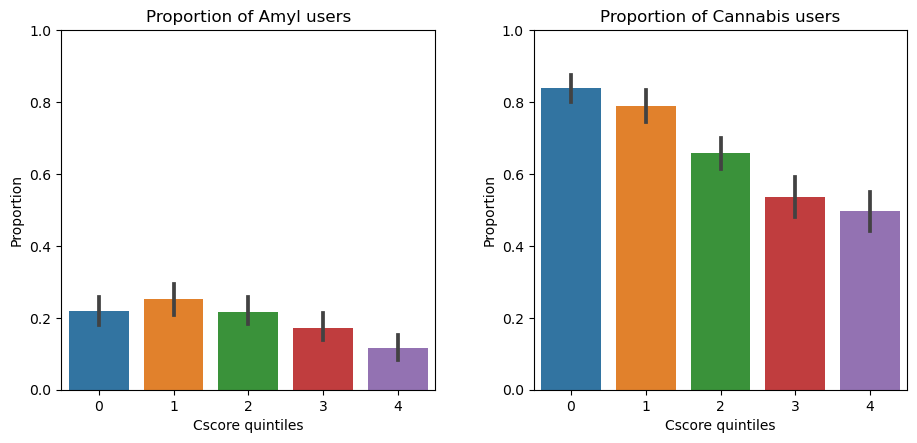

In [31]:
plot_qcut('Cscore')

C:\Users\nguye\AppData\Local\Temp\ipykernel_21492\3648929271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[var_qcut] = pd.qcut(temp_df[var], q=5, labels=np.arange(5))


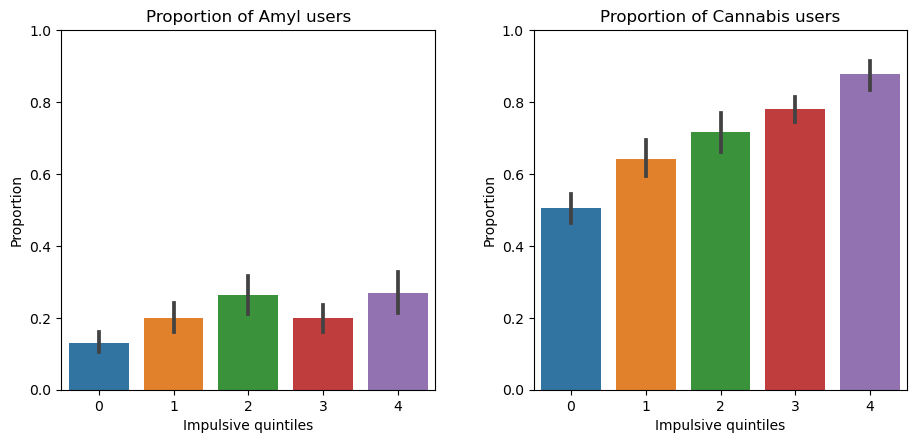

In [34]:
plot_qcut('Impulsive')

C:\Users\nguye\AppData\Local\Temp\ipykernel_21492\3648929271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[var_qcut] = pd.qcut(temp_df[var], q=5, labels=np.arange(5))


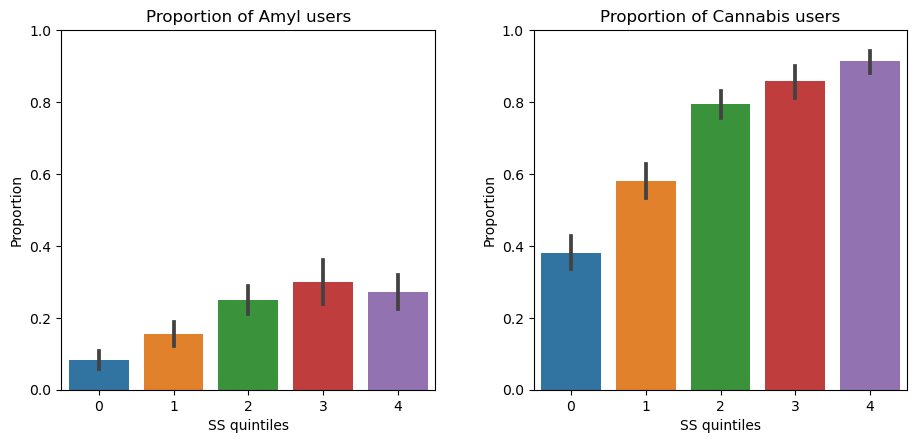

In [35]:
plot_qcut('SS')

In [ ]:
# Look at some non-linear relationship
# The relationship b/w Escore and Cannabis usage seem not to be linear.
# The relationship b/w SS and Amyl usage seem not to be linear.

In [41]:
def plot_qcut_10(var):
    var_qcut = var + '_qcut'
    temp_df = drug_1[[var, 'Amyl_user', 'Cannabis_user']]
    temp_df[var_qcut] = pd.qcut(temp_df[var], q=10, labels=np.arange(10))
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.tight_layout(pad=4)
    axes[0].set_ylim(top=1)
    axes[1].set_ylim(top=1)
    sns.barplot(data=temp_df, x=var_qcut, y='Amyl_user', ax=axes[0])
    sns.barplot(data=temp_df, x=var_qcut, y='Cannabis_user', ax=axes[1])
    axes[0].set(xlabel=(var + ' deciles'), ylabel='Proportion', title='Proportion of Amyl users')
    axes[1].set(xlabel=(var + ' deciles'), ylabel='Proportion', title='Proportion of Cannabis users');

C:\Users\nguye\AppData\Local\Temp\ipykernel_21492\2789831389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[var_qcut] = pd.qcut(temp_df[var], q=10, labels=np.arange(10))


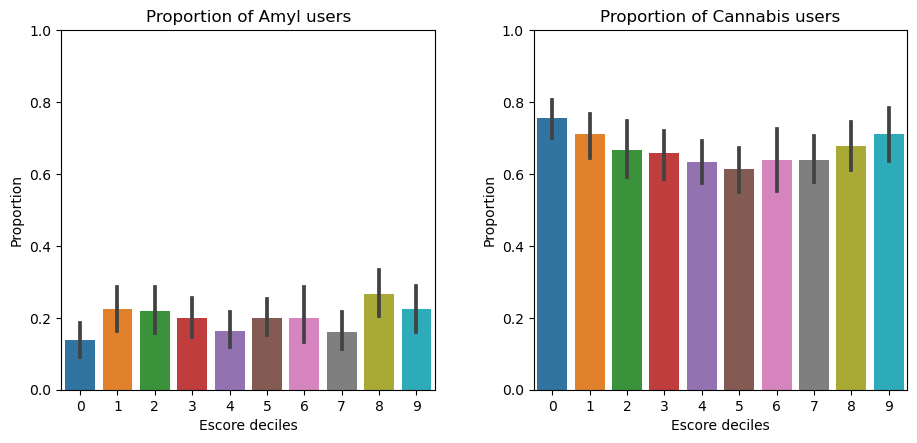

In [42]:
plot_qcut_10('Escore')

C:\Users\nguye\AppData\Local\Temp\ipykernel_21492\2789831389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[var_qcut] = pd.qcut(temp_df[var], q=10, labels=np.arange(10))


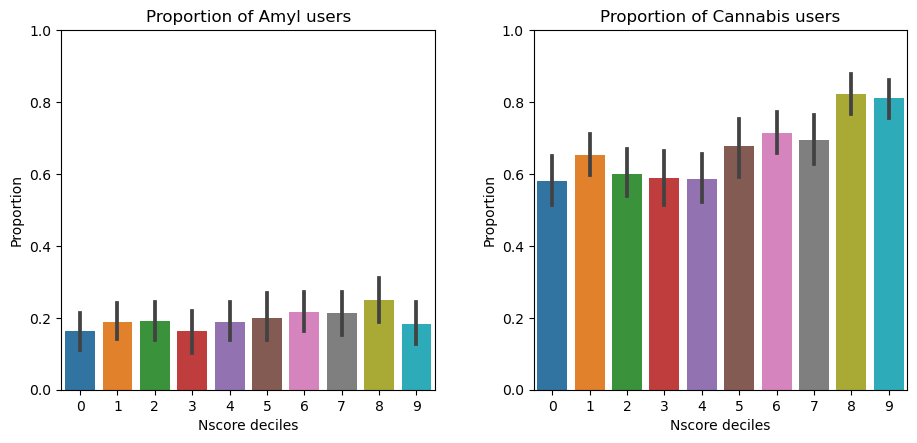

In [43]:
plot_qcut_10('Nscore')

<AxesSubplot:xlabel='SS', ylabel='Cannabis_user'>

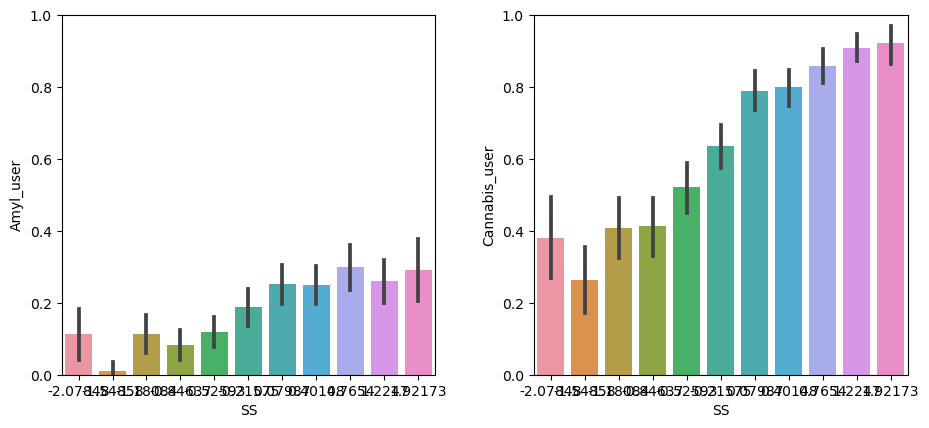

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=4)
axes[0].set_ylim(top=1)
axes[1].set_ylim(top=1)
sns.barplot(data=drug_1, x='SS', y='Amyl_user', ax=axes[0])
sns.barplot(data=drug_1, x='SS', y='Cannabis_user', ax=axes[1])
#axes[0].set(xlabel=(var + ' quintiles'), ylabel='Proportion', title='Proportion of Amyl users')
#axes[1].set(xlabel=(var + ' quintiles'), ylabel='Proportion', title='Proportion of Cannabis users');

### 3.3.3) Scatterplots of different pairs of features
- More formally we will scatterplot using the first two principal compoments. To be done in 3.4).

In [129]:
def plot_pair(xs, ys, colors, legend_title):
    fig, ax = plt.subplots()
    scatter = ax.scatter(xs, ys, c=colors, alpha=0.5)
    legend1 = ax.legend(*scatter.legend_elements(), title=legend_title)
    ax.add_artist(legend1)
#    ax.set_title('Principal Components and Cannabis Usage')
#    ax.set_xlabel('First Principal Component')
#    ax.set_ylabel('Second Principal Component')
    ax.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


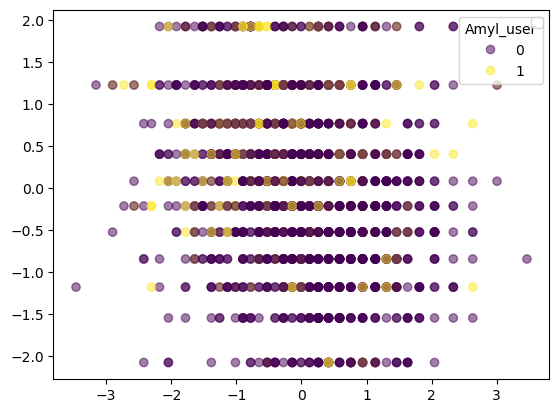

In [130]:
plot_pair(drug_1['Cscore'], drug_1['SS'], drug_1['Amyl_user'], legend_title='Amyl_user')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


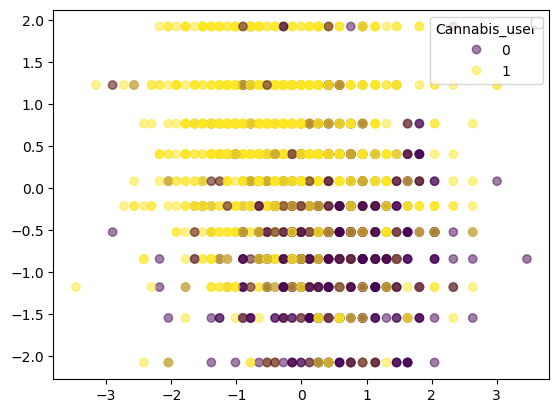

In [131]:
plot_pair(drug_1['Cscore'], drug_1['SS'], drug_1['Cannabis_user'], legend_title='Cannabis_user')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


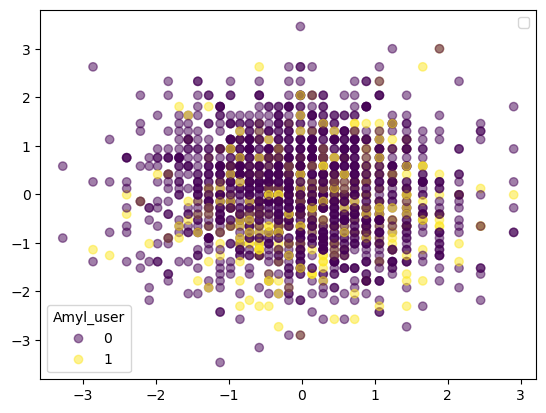

In [134]:
plot_pair(drug_1['Oscore'], drug_1['Cscore'], drug_1['Amyl_user'], legend_title='Amyl_user')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


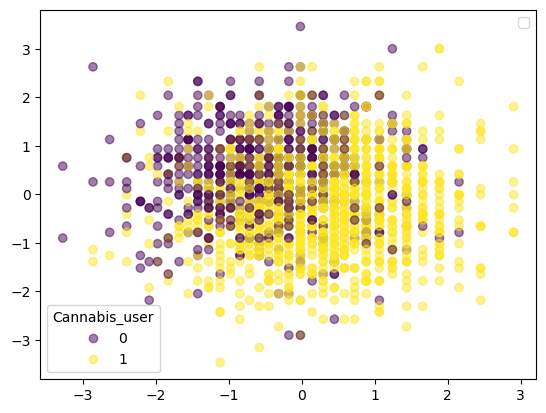

In [135]:
plot_pair(drug_1['Oscore'], drug_1['Cscore'], drug_1['Cannabis_user'], legend_title='Cannabis_user')

## 3.4) Principal Component Analysis (PCA)
- PCA for seven personality features ('Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS')
- PCA for seven personality features and Age, Gender, and Education

### 3.4.1) PCA for seven personality features
- There are some high correlation among them. Let check if we can reduce their dimensions. 
- The features are 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'

In [67]:
personality = drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
personality.head()

Nscore   Escore   Oscore   Ascore   Cscore  Impulsive       SS
0  0.31287 -0.57545 -0.58331 -0.91699 -0.00665   -0.21712 -1.18084
1 -0.67825  1.93886  1.43533  0.76096 -0.14277   -0.71126 -0.21575
2 -0.46725  0.80523 -0.84732 -1.62090 -1.01450   -1.37983  0.40148
3 -0.14882 -0.80615 -0.01928  0.59042  0.58489   -1.37983 -1.18084
4  0.73545 -1.63340 -0.45174 -0.30172  1.30612   -0.21712 -0.21575

In [68]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(personality)

PCA()

In [69]:
pca.n_components_

7

Text(0.5, 1.0, 'Magnitude of Variance Explained')

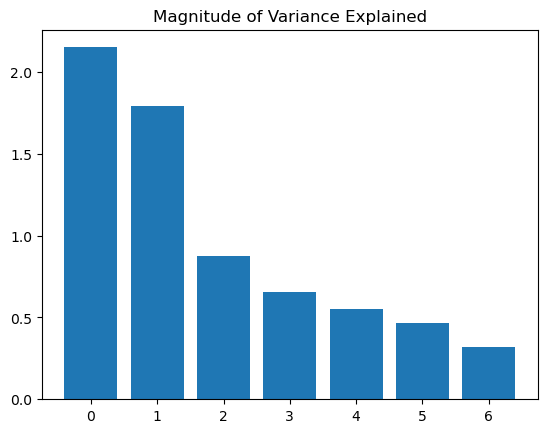

In [70]:
# Plot variance explained
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.title("Magnitude of Variance Explained")

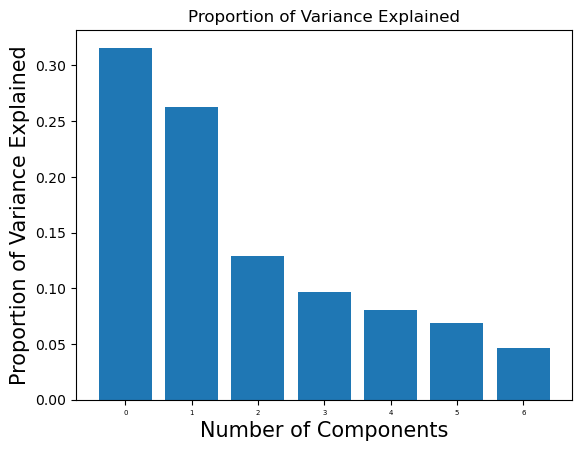

In [71]:
# Plot variance_ratio_ explained
variance = pca.explained_variance_ratio_

# Plot() it 
plt.bar(range(len(variance)), variance)

# Label the axes
plt.title("Proportion of Variance Explained")
plt.xlabel("Number of Components", size=15)
plt.ylabel("Proportion of Variance Explained", size=15)
plt.xticks(range(len(variance)), size=5);

In [74]:
print(variance)
print(variance.cumsum())
# So how many components we can use?

[0.31583524 0.26291498 0.12887505 0.09650704 0.08066129 0.06839991
 0.04680649]
[0.31583524 0.57875023 0.70762528 0.80413231 0.8847936  0.95319351
 1.        ]


### 3.4.2) PCA for seven personality features and Age, Gender and Education
- The features are 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'

In [267]:
personality_1 = drug_1[['Age_value', 'Gender_value', 'Education_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
personality_1.head()

Age_value  Gender_value  Education_value   Nscore   Escore   Oscore  \
0    0.49788       0.48246         -0.05921  0.31287 -0.57545 -0.58331   
1   -0.07854      -0.48246          1.98437 -0.67825  1.93886  1.43533   
2    0.49788      -0.48246         -0.05921 -0.46725  0.80523 -0.84732   
3   -0.95197       0.48246          1.16365 -0.14882 -0.80615 -0.01928   
4    0.49788       0.48246          1.98437  0.73545 -1.63340 -0.45174   

    Ascore   Cscore  Impulsive       SS  
0 -0.91699 -0.00665   -0.21712 -1.18084  
1  0.76096 -0.14277   -0.71126 -0.21575  
2 -1.62090 -1.01450   -1.37983  0.40148  
3  0.59042  0.58489   -1.37983 -1.18084  
4 -0.30172  1.30612   -0.21712 -0.21575

In [268]:
pca = sklearn.decomposition.PCA()
pca.fit(personality_1)

PCA()

In [269]:
pca.n_components_

10

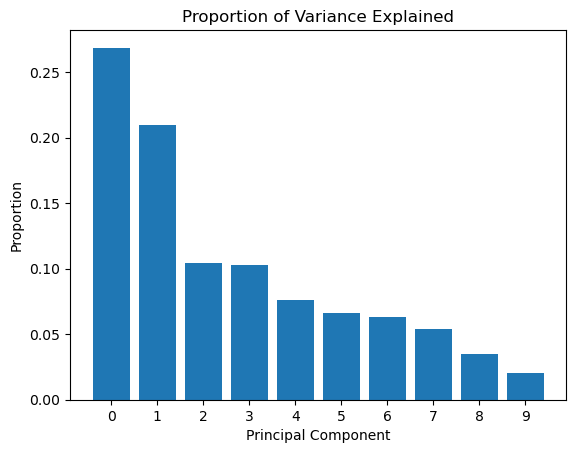

In [270]:
# Plot variance_ratio_ explained
variance = pca.explained_variance_ratio_

# Plot() it 
plt.bar(range(len(variance)), variance)

# Label the axes
plt.title("Proportion of Variance Explained")
plt.xlabel("Principal Component")
plt.ylabel("Proportion")
plt.xticks(range(len(variance)));

In [271]:
print(variance)
print(variance.cumsum())
# So how many components we can use?

[0.2685377  0.20941142 0.10457972 0.1025566  0.0760961  0.06617965
 0.06303549 0.0541321  0.03470654 0.02076467]
[0.2685377  0.47794912 0.58252885 0.68508545 0.76118155 0.8273612
 0.89039669 0.94452879 0.97923533 1.        ]


In [ ]:
# Plot samples using the first two principal components

In [272]:
transformed = pca.transform(personality_1)
print(type(transformed))
print(transformed.shape)

<class 'numpy.ndarray'>
(1885, 10)


In [273]:
xs = transformed[:,0]
ys = transformed[:,1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


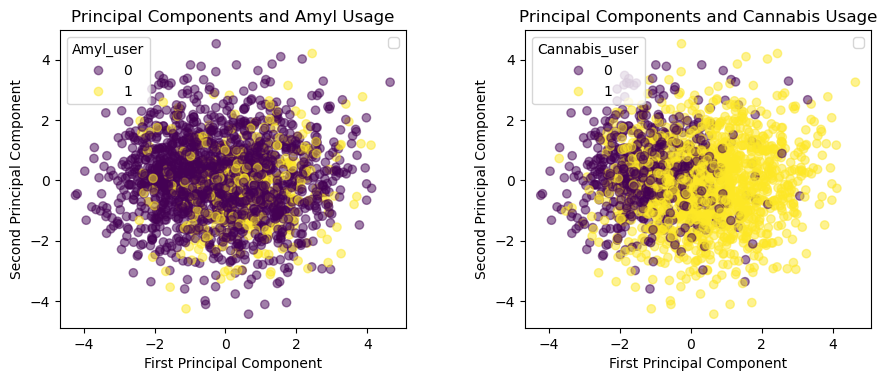

In [286]:
# Scatter plot with legend https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
# And maybe here https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html. 
# Choose an appropriate example from bottom of the page.

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

scatter = ax[0].scatter(xs, ys, c=drug_1.Amyl_user, alpha=0.5)
legend1 = ax[0].legend(*scatter.legend_elements(), title="Amyl_user", loc="upper left")
ax[0].add_artist(legend1)

ax[0].set_title('Principal Components and Amyl Usage')
ax[0].set_xlabel('First Principal Component')
ax[0].set_ylabel('Second Principal Component')
ax[0].legend()

scatter = ax[1].scatter(xs, ys, c=drug_1.Cannabis_user, alpha=0.5)
legend2 = ax[1].legend(*scatter.legend_elements(), title="Cannabis_user", loc="upper left")
ax[1].add_artist(legend2)

ax[1].set_title('Principal Components and Cannabis Usage')
ax[1].set_xlabel('First Principal Component')
ax[1].set_ylabel('Second Principal Component')
ax[1].legend()

fig.tight_layout(pad=5)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


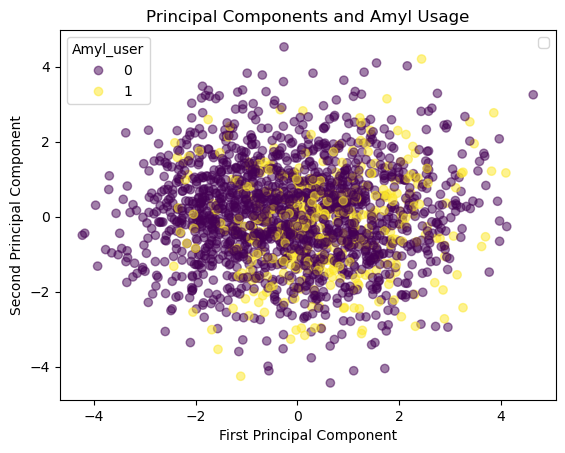

In [126]:
# Scatter plot with legend https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
# And maybe here https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html. 
# Choose an appropriate example from bottom of the page.

fig, ax = plt.subplots()
scatter = ax.scatter(xs, ys, c=drug_1.Amyl_user, alpha=0.5)
legend1 = ax.legend(*scatter.legend_elements(), title="Amyl_user", loc="upper left")
ax.add_artist(legend1)

ax.set_title('Principal Components and Amyl Usage')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


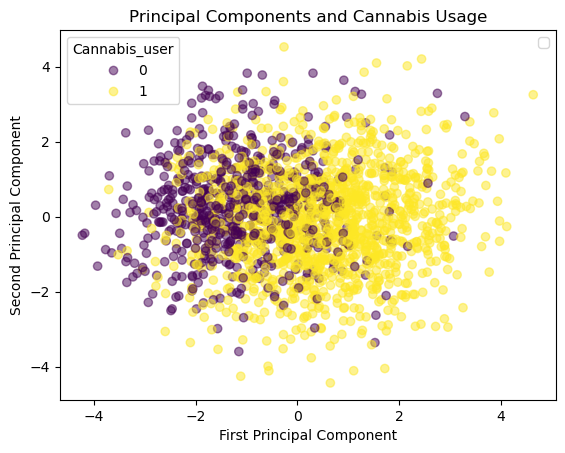

In [127]:
fig, ax = plt.subplots()
scatter = ax.scatter(xs, ys, c=drug_1.Cannabis_user, alpha=0.5)
legend1 = ax.legend(*scatter.legend_elements(), title="Cannabis_user", loc="upper left")
ax.add_artist(legend1)

ax.set_title('Principal Components and Cannabis Usage')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.legend()
plt.show()

<AxesSubplot:>

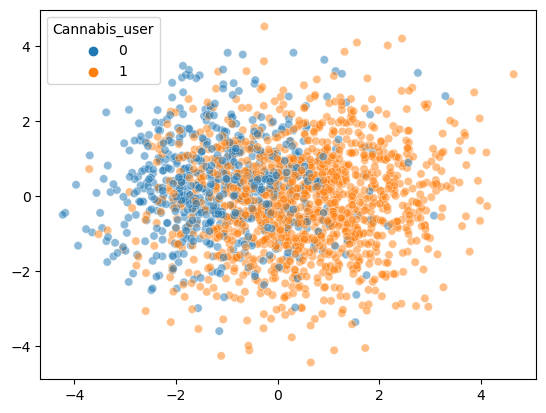

In [107]:
# Seaborn does legend by itself
sns.scatterplot(x=xs, y=ys, hue=drug_1.Cannabis_user, alpha=0.5)

## 3.5) Random forest feature importance

### 3.5.1) Prepare Dataframe X

In [ ]:
# Prepare data for Random Forest
# Ethnicity has almost one catogory, so will not be included in the analysis
# Features will include: 'Age_value', 'Gender_value', 'Education_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
# 'Impulsive', 'SS'
# 'Country' will becode as dummy

In [137]:
drug_dummies = pd.get_dummies(drug_1['Country'], drop_first=True)
drug_dummies.head()

Canada  New Zealand  Other  Republic of Ireland  UK  USA
0       0            0      0                    0   1    0
1       0            0      0                    0   1    0
2       0            0      0                    0   1    0
3       0            0      0                    0   1    0
4       0            0      0                    0   1    0

In [138]:
col_list = ['Age_value', 'Gender_value', 'Education_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
X = pd.concat([drug_dummies, drug_1[col_list]], axis=1)
X.sample(10)

Canada  New Zealand  Other  Republic of Ireland  UK  USA  Age_value  \
467        0            0      0                    0   1    0   -0.07854   
1149       0            0      0                    0   0    1    0.49788   
748        0            0      0                    0   1    0   -0.07854   
334        0            0      0                    0   1    0   -0.07854   
482        0            0      0                    0   1    0   -0.07854   
1324       0            0      0                    0   0    1   -0.95197   
1371       0            0      0                    0   1    0    1.09449   
1621       0            0      0                    0   1    0    0.49788   
1662       0            0      0                    0   1    0   -0.07854   
1723       0            0      0                    0   1    0   -0.07854   

      Gender_value  Education_value   Nscore   Escore   Oscore   Ascore  \
467       -0.48246          0.45468 -1.19430  1.74091  1.43533  0.76096   
1149       0.48246          0.45468  1.72012 -1.76250 -0.58331 -0.30172   
748        0.48246         -0.05921 -2.34360  1.45421 -1.82919  1.11406   
334        0.48246          1.16365  0.41667 -0.57545  0.58331  0.43852   
482        0.48246          0.45468  1.23461  0.47617  1.43533  0.28783   
1324      -0.48246         -0.61113 -1.32828 -0.30033  0.14143  1.28610   
1371      -0.48246          0.45468 -0.58016 -0.57545 -0.01928 -0.15487   
1621      -0.48246         -0.61113 -0.79151  0.47617 -0.01928  0.13136   
1662       0.48246          0.45468 -0.58016  0.47617 -0.71727  2.03972   
1723       0.48246          1.16365  0.13606  0.32197  0.58331 -0.76096   

       Cscore  Impulsive       SS  
467  -0.00665    0.88113  1.22470  
1149 -1.25773    0.88113 -0.84637  
748   1.30612   -0.21712 -0.84637  
334  -1.01450    1.86203  0.76540  
482   0.93949    0.19268 -0.84637  
1324  1.13407    0.19268 -0.21575  
1371 -0.14277   -1.37983 -1.18084  
1621  0.12331   -0.21712  0.07987  
1662  0.93949    0.19268 -0.21575  
1723 -0.52745   -2.55524 -0.84637

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### 3.5.2) Feature importance to predict Amyl user

In [139]:
y = drug_1['Amyl_binary']
y.head()

0    Non-user
1        User
2    Non-user
3    Non-user
4    Non-user
Name: Amyl_binary, dtype: object

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [149]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1508, 16) (1508,)
(377, 16) (377,)


In [150]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print('Train accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test accuracy: ', accuracy_score(y_test, y_pred_test))

Train accuracy:  1.0
Test accuracy:  0.7771883289124668


In [152]:
rf.feature_importances_

array([0.00693717, 0.00135578, 0.00990458, 0.00551344, 0.0257266 ,
       0.03268164, 0.06948812, 0.03180925, 0.07020096, 0.11629723,
       0.11114312, 0.11453955, 0.11113792, 0.11990851, 0.07474483,
       0.09861129])

16
16


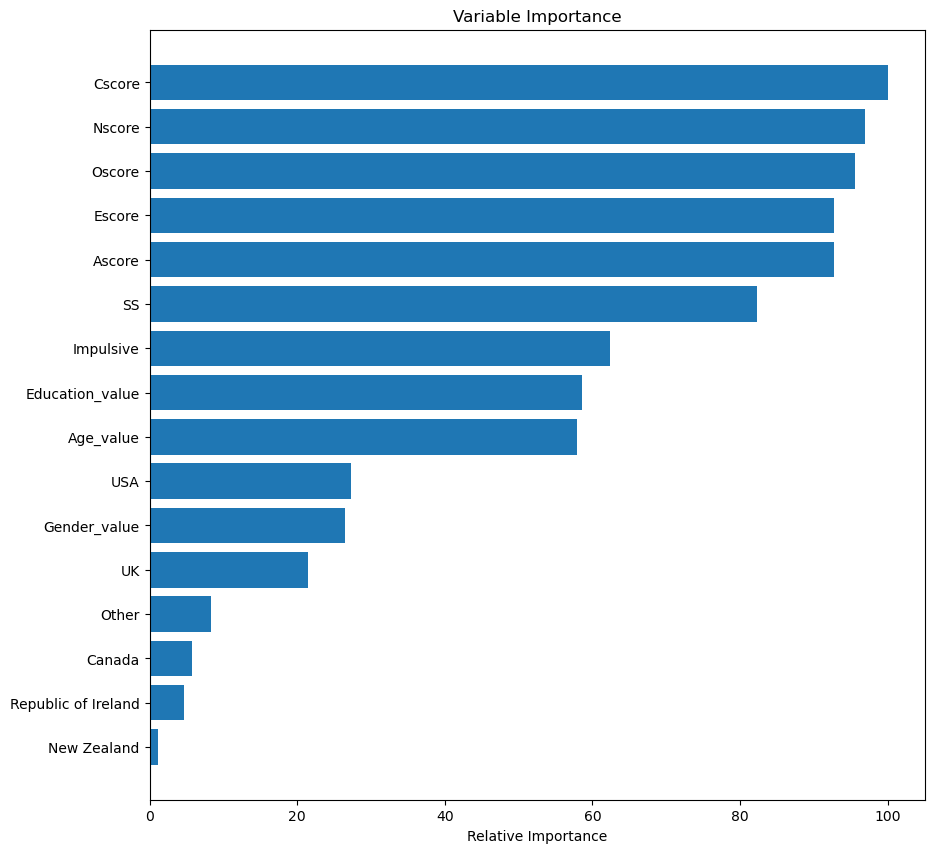

In [162]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
print(sorted_idx.size)
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### 3.5.3) Feature importance to predict Cannabis user

In [163]:
y = drug_1['Cannabis_binary']
y.head()

0    Non-user
1        User
2        User
3        User
4        User
Name: Cannabis_binary, dtype: object

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1508, 16) (1508,)
(377, 16) (377,)


In [165]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print('Train accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test accuracy: ', accuracy_score(y_test, y_pred_test))

Train accuracy:  1.0
Test accuracy:  0.8090185676392573


In [166]:
rf.feature_importances_

array([3.49230210e-03, 7.19238216e-05, 4.40518446e-03, 1.27923773e-03,
       1.10262410e-01, 4.40668498e-02, 1.19523508e-01, 2.00303823e-02,
       5.77514093e-02, 8.81384565e-02, 7.88355176e-02, 1.18042201e-01,
       8.03333048e-02, 1.07155698e-01, 5.85249863e-02, 1.08086628e-01])

16
16


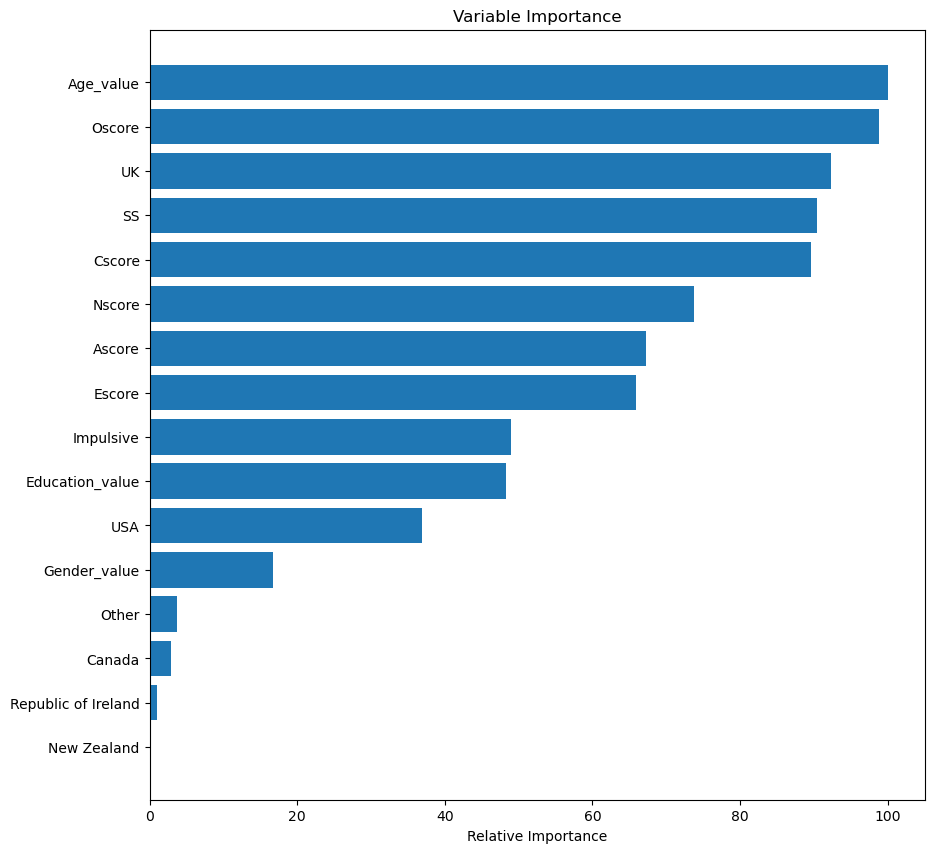

In [167]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
print(sorted_idx.size)
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## 3.6) Extra learning
### 3.6.1) qgrid

In [5]:
import qgrid

In [10]:
help (qgrid)

Help on package qgrid:

NAME
    qgrid

PACKAGE CONTENTS
    _version
    grid
    pd_json (package)
    tests (package)

CLASSES
    ipywidgets.widgets.domwidget.DOMWidget(ipywidgets.widgets.widget.Widget)
        qgrid.grid.QgridWidget
    
    QGridWidget = class QgridWidget(ipywidgets.widgets.domwidget.DOMWidget)
     |  QGridWidget(*args, **kwargs)
     |  
     |  The widget class which is instantiated by the ``show_grid`` method. This
     |  class can be constructed directly but that's not recommended because
     |  then default options have to be specified explicitly (since default
     |  options are normally provided by the ``show_grid`` method).
     |  
     |  The constructor for this class takes all the same parameters as
     |  ``show_grid``, with one exception, which is that the required
     |  ``data_frame`` parameter is replaced by an optional keyword argument
     |  called ``df``.
     |  
     |  See Also
     |  --------
     |  show_grid : The method that sho

In [7]:
qgrid.show_grid(drug_1)

AttributeError: module 'pandas.core' has no attribute 'index'

### 3.6.2) xlwings

In [11]:
import xlwings as xw

In [12]:
xw.view(drug_1)

### 3.6.3) Pandas-Profiling

In [15]:
import pandas_profiling

ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\generic.py)